# End-to-End Machine Learning Project
    
En este capítulo se desarrolla un ejemplo completo de un proyecto de *machine learning*, asumiendo el papel de un científico de datos recién contratado en una empresa inmobiliaria. El ejemplo es ficticio: el objetivo no es aprender sobre bienes raíces, sino entender **todas las etapas de un proyecto de ML real**.
    
Pasos en el proyecto:
    
1.  **Ver la visión general** — Comprender el problema y el objetivo del proyecto.
2. **Obtener los datos** — Reunir las fuentes de información necesarias.
3. **Explorar y visualizar los datos** — Analizar y detectar patrones, relaciones o anomalías.
4. **Preparar los datos** — Limpiar, transformar y dejar listos los datos para los algoritmos.
5. **Seleccionar y entrenar un modelo** — Probar distintos modelos de *machine learning*.
6. **Ajustar el modelo** — Optimizar los hiperparámetros y mejorar el rendimiento.
7. **Presentar la solución** — Comunicar resultados y conclusiones de forma clara.
8. **Desplegar, monitorear y mantener el sistema** — Implementar el modelo en producción y mantenerlo actualizado.

Cuando queremos experimentar/aprender sobre machine learning, lo mejor es usar datos reales, y no un conjunto de datos inventados que no se corresponden con la realidad. por suerte para nosotros, hay un montón de páginas, repositorios y proyetos de donde podremos conseguir conjuntos de datos reales y de una multitud de campos de conocimiento.

Por ejemplo, dos portales my populares donde podremos conseguir datos son:
1. OpenML.org
2. Kaggle.com

Para este cuaderno y para aprender los conceptos que Gerón explica en este capítulo del libro, vamos a usar un conjunto de datos que representa los previos de las viviendas de California, y que podemos conseguir del repositorio StatLib.

Estos datos se basan en el censo que se hizo en California en 1990. No son los datos mas recientes pero para aprender los conceptos de este capitulo nos servirán.

Entonces, la idea de este capítulo es construir un modelo de precios de viviendas en California utilizando los datos del censo.

Estos datos incluyen variables como:

* Población
* Ingreso medio (median income)
* Precio medio de la vivienda (median housing price)
para cada grupo de bloques (block group), que es la unidad geográfica más pequeña en la que la Oficina del Censo de EE.UU. publica datos (normalmente entre 600 y 3.000 habitantes).
Por simplicidad, el texto los llama “distritos”.

El objetivo es que el modelo aprenda a predecir el precio medio de la vivienda de un distrito a partir de las demás variables.

Antes de construir el modelo, debes entender el propósito de negocio: en este caso, predecir precios de vivienda para mejorar las decisiones de inversión.
Por ejemplo: el modelo sustituirá un proceso manual ineficiente y servirá como parte de un sistema automático de inversión inmobiliaria.

# Concepto de pipeline
Un pipeline es una secuencia de componentes de procesamiento de datos, muy común en sistemas de machine learning porque los datos necesitan múltiples transformaciones.

Cada componente:

1. Lee un conjunto de datos,
2. Los procesa,
3. Y genera una salida que otro componente usará después.

Estos componentes suelen ejecutarse de forma asíncrona y están aislados entre sí, comunicándose solo mediante los almacenes de datos.
Esto facilita la comprensión del sistema, permite que equipos distintos trabajen en partes diferentes y aumenta la robustez, ya que si un componente falla, los demás pueden seguir funcionando temporalmente con los últimos datos válidos.

Sin embargo, si no hay una buena supervisión o monitoreo, un componente roto puede pasar desapercibido, haciendo que los datos se vuelvan obsoletos y que baje el rendimiento global del sistema.

# Diseño del sistema

Antes de diseñar el sistema, hay que definir el tipo de aprendizaje que se usará:

* supervisado
* no supervisado
* semisupervisado
* autossupervisado
* por refuerzo

¿Y el problema es de clasificación, regresión u otro tipo?

También se debe decidir si se empleará aprendizaje por lotes (batch) o aprendizaje en línea (online).

En este caso:

Es un aprendizaje supervisado, porque cada muestra incluye su etiqueta (el precio medio del distrito).

Es un problema de regresión, ya que el modelo predice un valor numérico.

Más concretamente, es una regresión múltiple (usa varias características como ingresos, población, etc.) y univariante (solo predice un valor por distrito).

Dado que los datos no llegan de forma continua y caben en memoria, el aprendizaje por lotes es suficiente.

💡 Nota:
Si los datos fueran demasiado grandes, se podría dividir el aprendizaje en varios servidores (con MapReduce) o usar aprendizaje en línea.

# **Seleccionar una métrica de rendimiento**

El siguiente paso es elegir una métrica de evaluación para medir qué tan bien funciona el modelo.
En los problemas de regresión, la medida más común es el error cuadrático medio (RMSE, Root Mean Square Error).

El RMSE indica cuánto se equivoca el modelo en promedio al hacer predicciones, penalizando más los errores grandes.

Fórmula:

$$
RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2}
$$


Donde:

$$
\begin{aligned}
h(x^{(i)}) &:\ \text{predicción del modelo para el ejemplo } i \\
y^{(i)} &:\ \text{valor real} \\
m &:\ \text{número total de muestras}
\end{aligned}
$$


👉 En resumen: el RMSE mide la precisión promedio de las predicciones, y valores menores indican un modelo más preciso.

# Notaciones en Machine Learning

**m** representa el número de instancias en el conjunto de datos sobre el que se está midiendo el error (por ejemplo, si evalúas el RMSE en un conjunto de validación de 2,000 distritos, entonces m = 2,000).

**x⁽ⁱ⁾** es un vector que contiene todos los valores de las características (excluyendo la etiqueta) de la i-ésima instancia del conjunto de datos, mientras que **y⁽ⁱ⁾** es su etiqueta o valor deseado. Por ejemplo, si el primer distrito está localizado en longitud –118.29°, latitud 33.91°, con 1,416 habitantes, ingreso medio de 38,372 dólares y valor medio de vivienda de $156,400, entonces $$x^{(1)} = [-118.29, 33.91, 1416, 38372]$$ y $$y^{(1)} = 156400$$.

**X** es una matriz que contiene todos los valores de características (sin etiquetas) de todas las instancias del conjunto de datos. Cada fila representa una instancia, y la i-ésima fila es igual a la transpuesta de x⁽ⁱ⁾, notada como $$(x^{(i)})^T$$. La matriz X tiene una estructura donde cada fila es una instancia completa del dataset.

**h** es la función de predicción del sistema, también llamada hipótesis. Cuando el sistema recibe el vector de características x⁽ⁱ⁾ de una instancia, produce un valor predicho $$\hat{y}^{(i)} = h(x^{(i)})$$ para esa instancia (ŷ se pronuncia "y-hat"). El error de predicción para una instancia es simplemente $$\hat{y}^{(i)} - y^{(i)}$$.

**RMSE(X, h)** es la función de costo medida sobre el conjunto de ejemplos utilizando la hipótesis h.

En cuanto a convenciones tipográficas: se usa fuente itálica minúscula para valores escalares (como m o y) y nombres de funciones (como h), fuente negrita minúscula para vectores (como **x**), y fuente negrita mayúscula para matrices (como **X**).

# Métricas de Error: RMSE vs MAE

Aunque el RMSE es generalmente la medida de rendimiento preferida para tareas de regresión, en algunos contextos puede ser preferible usar otras funciones. Por ejemplo, cuando hay muchos valores atípicos (outliers) en los datos, se puede considerar usar el error absoluto medio (MAE, también llamado desviación absoluta promedio), definido como $$MAE(X, h) = \frac{1}{m}\sum_{i=1}^{m}|h(x^{(i)}) - y^{(i)}|$$

Tanto el RMSE como el MAE son formas de medir la distancia entre dos vectores: el vector de predicciones y el vector de valores objetivo.

Existen varias medidas de distancia o normas posibles.

Calcular la raíz de una suma de cuadrados (RMSE) corresponde a la norma euclidiana, también llamada norma $$\ell_2$$ y notada como $$\|\cdot\|_2$$ o simplemente $$\|\cdot\|$$

que es la noción de distancia con la que todos estamos familiarizados.

Calcular la suma de valores absolutos (MAE) corresponde a la norma $$\ell_1$$

notada como $$\|\cdot\|_1$$

también llamada norma Manhattan porque mide la distancia entre dos puntos en una ciudad si solo puedes moverte a lo largo de bloques ortogonales.

De manera más general, la norma $$\ell_k$$ de un vector **v** que contiene n elementos se define como $$\|v\|_k = (|v_1|^k + |v_2|^k + ... + |v_n|^k)^{1/k}$$

La norma $$\ell_0$$ da el número de elementos distintos de cero en el vector, y $$\ell_\infty$$ da el valor absoluto máximo en el vector.

Cuanto mayor es el índice de la norma, más se enfoca en valores grandes y descuida los pequeños. Por eso el RMSE es más sensible a los outliers que el MAE. Sin embargo, cuando los outliers son exponencialmente raros (como en una curva con forma de campana), el RMSE funciona muy bien y generalmente se prefiere.

# Verificar los Supuestos
Como última práctica recomendada antes de comenzar a codificar, es importante listar y verificar los supuestos que se han hecho hasta el momento, ya que esto puede ayudarte a detectar problemas serios de manera temprana. Por ejemplo, si asumes que tu sistema generará precios exactos para un sistema downstream, pero ese sistema en realidad solo necesita categorías ("barato", "medio", "caro"), entonces el problema debería haberse planteado como clasificación y no regresión. Descubrir esto después de meses de trabajo sería costoso. Verificar con anticipación que el sistema downstream necesita efectivamente los precios reales te permite comenzar a programar con la confianza de que estás resolviendo el problema correcto.

# Obtener los datos

In [146]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    # Define la ruta donde se guardará el archivo comprimido
    tarball_path = Path("datasets/housing.tgz")

    # Verifica si el archivo ya existe
    if not tarball_path.is_file():
        # Crea el directorio 'datasets' si no existe
        Path("datasets").mkdir(parents=True, exist_ok=True)

        # URL del archivo de datos en GitHub
        url = "https://github.com/ageron/data/raw/main/housing.tgz"

        # Descarga el archivo desde la URL y lo guarda en tarball_path
        urllib.request.urlretrieve(url, tarball_path)

        # Abre el archivo comprimido (.tgz)
        with tarfile.open(tarball_path) as housing_tarball:
          # Extrae todo el contenido en el directorio 'datasets'
          housing_tarball.extractall(path="datasets")

    # Lee el archivo CSV y lo retorna como un DataFrame de pandas
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Carga los datos de vivienda llamando a la función
housing = load_housing_data()

# Primer vistazo a la estructura de los datos

Antes de empezar, veamos qué aspecto tienen los datos. Veamos con head() los primeros 5 registros o filas del dataframe:

In [147]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Cada una de las filas representa un distrito, y vemos que hay 10 atributos:

* **longitude** – longitud geográfica del distrito  
* **latitude** – latitud geográfica del distrito  
* **housing_median_age** – edad mediana de las viviendas en el distrito  
* **total_rooms** – número total de habitaciones en el distrito  
* **total_bedrooms** – número total de dormitorios en el distrito  
* **population** – población total del distrito  
* **households** – número total de hogares (familias) en el distrito  
* **median_income** – ingreso medio de los hogares en el distrito  
* **median_house_value** – valor mediano de las viviendas (variable objetivo)  
* **ocean_proximity** – categoría que indica la cercanía al océano

El método info() es muy útil para obtener una rápida descripción de los datos, en particular el número de filas, el tipo de cada uno de los atributos, y el número de valores existentes (o no nulos):

In [148]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


El conjunto de datos contiene 20,640 instancias, lo cual es relativamente pequeño según los estándares de machine learning, pero es adecuado para comenzar. Se observa que el atributo total_bedrooms tiene solo 20,433 valores no nulos, lo que significa que 207 distritos tienen este valor faltante, situación que deberá abordarse posteriormente. Todos los atributos son numéricos excepto ocean_proximity, cuyo tipo es object, lo que indica que podría contener cualquier tipo de objeto Python. Sin embargo, dado que los datos provienen de un archivo CSV, se puede confirmar que es un atributo de texto. Al examinar las primeras filas, se observa que los valores en la columna ocean_proximity son repetitivos, lo que sugiere que se trata de un atributo categórico.

In [149]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


# Resumen Estadístico de Atributos Numéricos

El método describe() proporciona un resumen de los atributos numéricos del conjunto de datos. Las filas count, mean, min y max son autoexplicativas, y es importante notar que los valores nulos son ignorados en el cálculo (por ejemplo, el count de total_bedrooms es 20,433, no 20,640). La fila std muestra la desviación estándar, que mide qué tan dispersos están los valores. Las filas 25%, 50% y 75% muestran los percentiles correspondientes: un percentil indica el valor por debajo del cual cae un determinado porcentaje de observaciones. Por ejemplo, el 25% de los distritos tienen un housing_median_age menor a 18, mientras que el 50% es menor a 29 y el 75% es menor a 37. Estos valores se conocen como el percentil 25 (o primer cuartil), la mediana, y el percentil 75 (o tercer cuartil), respectivamente.

In [150]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualización con Histogramas
Otra forma rápida de familiarizarse con el tipo de datos con los que se está trabajando es graficar un histograma para cada atributo numérico. Un histograma muestra el número de instancias (en el eje vertical) que tienen un rango de valores determinado (en el eje horizontal). Se puede graficar un atributo a la vez, o bien llamar al método hist() sobre todo el conjunto de datos, lo cual generará automáticamente un histograma para cada atributo numérico, permitiendo una visualización rápida y completa de la distribución de los datos.

In [151]:
# Código adicional – código para guardar las figuras como PNGs de alta resolución

# Define la ruta donde se guardarán las imágenes
IMAGES_PATH = Path() / "images" / "end_to_end_project"

# Crea el directorio si no existe (parents=True crea directorios padres si es necesario)
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    # Construye la ruta completa del archivo con el ID y la extensión
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"

    # Si tight_layout está activado, ajusta automáticamente el espaciado de la figura
    if tight_layout:
        plt.tight_layout()

    # Guarda la figura en la ruta especificada con el formato y resolución indicados
    plt.savefig(path, format=fig_extension, dpi=resolution)

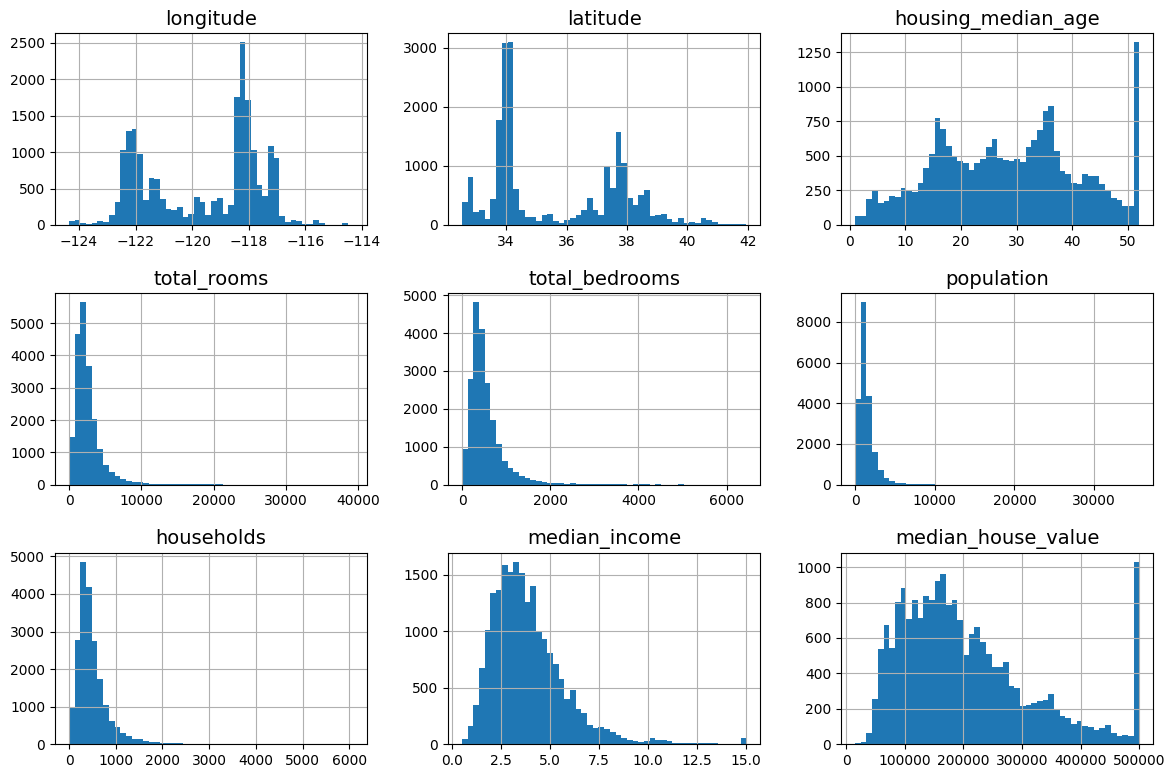

In [152]:
import matplotlib.pyplot as plt

# Código adicional – las siguientes 5 líneas definen los tamaños de fuente predeterminados
plt.rc('font', size=14)  # Tamaño de fuente general
plt.rc('axes', labelsize=14, titlesize=14)  # Tamaño de etiquetas y títulos de los ejes
plt.rc('legend', fontsize=14)  # Tamaño de fuente de la leyenda
plt.rc('xtick', labelsize=10)  # Tamaño de las etiquetas del eje X
plt.rc('ytick', labelsize=10)  # Tamaño de las etiquetas del eje Y

# Crea histogramas para todos los atributos numéricos del dataset
# bins=50: divide los datos en 50 intervalos
# figsize=(12, 8): define el tamaño de la figura en pulgadas
housing.hist(bins=50, figsize=(12, 8))

# Guarda la figura (código adicional)
save_fig("attribute_histogram_plots")

# Muestra la figura en pantalla
plt.show()

**Nota sobre el parámetro bins de la funcion hist()**

Un histograma agrupa los valores en "contenedores" o "intervalos" (bins en inglés) para contar cuántas observaciones caen en cada rango.

Por ejemplo, si tienes edades de personas entre 0 y 100 años y usas bins=50, el histograma dividirá ese rango en 50 intervalos iguales (0-2, 2-4, 4-6, etc.) y contará cuántas personas caen en cada intervalo.

Cada barra del histograma representa uno de esos intervalos.

* Más bins = más detalle pero puede verse ruidoso
* Menos bins = menos detalle pero se ven mejor las tendencias generales

En el código anterior, bins=50 significa que cada atributo numérico se dividirá en 50 rangos de valores para crear su histograma.

# Análisis de los Histogramas

Al observar los histogramas, se identifican varios aspectos importantes del conjunto de datos.

Primero, el atributo median income no está expresado en dólares estadounidenses, sino que ha sido escalado y limitado entre 0.5 (0.4999) y 15 (15.0001), donde los números representan aproximadamente decenas de miles de dólares (por ejemplo, 3 significa alrededor de $30,000). Trabajar con atributos preprocesados es común en machine learning, aunque es fundamental comprender cómo fueron procesados los datos.

Tanto housing median age como median house value también fueron limitados (capped).

Esto último puede ser problemático ya que median house value es el atributo objetivo, y los algoritmos podrían aprender que los precios nunca superan ese límite.

Aquí, como nota, sería necesario consultar con el equipo cliente si necesitan predicciones precisas más allá de $500,000. En ese caso, hay dos opciones:

* Recopilar etiquetas correctas para los distritos cuyos valores fueron limitados
* Eliminar esos distritos tanto del conjunto de entrenamiento como del de prueba.

Los atributos tienen escalas muy diferentes, tema que se abordará posteriormente al explorar el escalado de características.

Finalmente, muchos histogramas presentan asimetría positiva (skewed right), extendiéndose más hacia la derecha de la mediana que hacia la izquierda, lo cual puede dificultar que algunos algoritmos detecten patrones. Posteriormente se considerará transformar estos atributos para obtener distribuciones más simétricas y con forma de campana.

# Crear un Conjunto de Prueba (Test Set)

**ADVERTENCIA:** Antes de examinar los datos más a fondo, es necesario crear un conjunto de prueba, apartarlo y nunca observarlo durante el desarrollo del modelo.

Puede parecer extraño separar voluntariamente parte de los datos en esta etapa temprana, especialmente cuando apenas se ha echado un vistazo al dataset y parece lógico aprender mucho más sobre él antes de decidir qué algoritmos usar.

Sin embargo, el cerebro humano es un sistema excepcional de detección de patrones, lo cual también lo hace altamente propenso al sobreajuste (overfitting).

Si observas el conjunto de prueba, puedes encontrar patrones aparentemente interesantes que te lleven a seleccionar un tipo particular de modelo de machine learning. Cuando posteriormente estimes el error de generalización usando ese test set, tu estimación será demasiado optimista y lanzarás un sistema que no funcionará tan bien como esperabas. Esto se conoce como sesgo de fisgonear los datos (data snooping bias).

Crear un conjunto de prueba es teóricamente simple: se seleccionan algunas instancias aleatoriamente, típicamente el 20% del conjunto de datos (o menos si el dataset es muy grande), y se apartan para no ser utilizadas durante el entrenamiento:

In [153]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    # Genera una permutación aleatoria de los índices del dataset
    # Esto mezcla aleatoriamente el orden de las filas
    shuffled_indices = np.random.permutation(len(data))

    # Calcula el tamaño del conjunto de prueba basándose en el ratio especificado
    # Por ejemplo, si test_ratio=0.2 y hay 1000 filas, test_set_size=200
    test_set_size = int(len(data) * test_ratio)

    # Selecciona los primeros índices mezclados para el conjunto de prueba
    test_indices = shuffled_indices[:test_set_size]

    # Selecciona los índices restantes para el conjunto de entrenamiento
    train_indices = shuffled_indices[test_set_size:]

    # Retorna dos DataFrames: uno para entrenamiento y otro para prueba
    # iloc accede a las filas por posición usando los índices especificados
    return data.iloc[train_indices], data.iloc[test_indices]

**Explicación:**

Esta función divide un conjunto de datos en conjuntos de entrenamiento y prueba de manera aleatoria. Primero genera una permutación aleatoria de todos los índices del dataset para mezclar las filas, luego calcula cuántas filas corresponden al conjunto de prueba según el ratio especificado (por ejemplo, 0.2 para 20%). Posteriormente separa los índices mezclados en dos grupos: los primeros para el test set y los restantes para el training set. Finalmente, utiliza estos índices para extraer las filas correspondientes del DataFrame original y retorna ambos conjuntos como DataFrames separados.

In [154]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [155]:
len(test_set)

4128

Para garantizar que las salidas de este notebook permanezcan iguales cada vez que lo ejecutemos, necesitamos establecer la semilla aleatoria (random seed).

In [156]:
np.random.seed(42)

# Estabilidad en la División Train/Test

Al generar conjuntos de entrenamiento y prueba de manera aleatoria, surge el problema de que ejecutar el programa repetidamente producirá divisiones diferentes cada vez. Con el tiempo, esto podría resultar en que los algoritmos vean todo el dataset, lo cual se desea evitar.

Una solución es guardar el conjunto de prueba en la primera ejecución y cargarlo en ejecuciones posteriores.

Otra opción es establecer la semilla del generador de números aleatorios (por ejemplo, con np.random.seed(42)) antes de llamar a np.random.permutation(), asegurando que siempre genere los mismos índices barajados.

Sin embargo, ambas soluciones fallarán cuando se obtenga una versión actualizada del dataset. Para mantener una división train/test estable incluso después de actualizar los datos, una solución común es usar el identificador único e inmutable de cada instancia para decidir si debe ir al conjunto de prueba.

Por ejemplo, se puede calcular un hash del identificador de cada instancia y colocar esa instancia en el conjunto de prueba si el hash es menor o igual al 20% del valor hash máximo. Esto garantiza que el conjunto de prueba permanezca consistente en múltiples ejecuciones, incluso al actualizar el dataset. El nuevo conjunto de prueba contendrá el 20% de las nuevas instancias, pero no contendrá ninguna instancia que previamente estuviera en el conjunto de entrenamiento.

In [157]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    """
    Determina si una instancia debe ir al conjunto de prueba basándose en su identificador.

    Calcula el hash CRC32 del identificador y lo compara con un umbral.
    Si el hash es menor que test_ratio * 2^32, la instancia va al conjunto de prueba.
    Esto garantiza una división estable y reproducible.
    """
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    """
    Divide el dataset en conjuntos de entrenamiento y prueba usando hash de identificadores.

    Args:
        data: DataFrame con los datos
        test_ratio: proporción de datos para el conjunto de prueba (ej: 0.2 para 20%)
        id_column: nombre de la columna que contiene los identificadores únicos

    Returns:
        Tupla con dos DataFrames: (datos_entrenamiento, datos_prueba)
    """
    # Extrae la columna de identificadores
    ids = data[id_column]

    # Aplica la función is_id_in_test_set a cada identificador
    # Crea una máscara booleana indicando qué instancias van al conjunto de prueba
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))

    # Retorna dos DataFrames: entrenamiento (~in_test_set niega la máscara) y prueba
    return data.loc[~in_test_set], data.loc[in_test_set]

Desafortunadamente, el conjunto de datos de viviendas no tiene una columna de identificador. La solución más simple es usar el índice de fila como ID:

In [158]:
# Reinicia el índice del DataFrame y lo convierte en una columna llamada 'index'
# Esto crea un identificador único para cada fila que se usará para la división estable
housing_with_id = housing.reset_index()

# Divide el dataset en conjuntos de entrenamiento (80%) y prueba (20%)
# Usa la columna 'index' como identificador para garantizar que la división
# sea consistente incluso si se actualiza el dataset en el futuro
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

Si usas el índice de fila como identificador único, debes asegurarte de que los nuevos datos se agreguen al final del dataset y que ninguna fila sea eliminada. Si esto no es posible, entonces puedes intentar usar las características más estables para construir un identificador único. Por ejemplo, la latitud y longitud de un distrito están garantizadas de permanecer estables por algunos millones de años, por lo que podrías combinarlas en un ID de la siguiente manera:

In [159]:
# Crea un identificador único personalizado combinando longitud y latitud
# Multiplica la longitud por 1000 y le suma la latitud para crear un ID único
# Esto es útil cuando el índice del DataFrame no es estable (puede cambiar al ordenar/filtrar)
# pero las coordenadas geográficas de cada distrito permanecen constantes
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

# Divide el dataset usando el ID basado en coordenadas geográficas
# Esto garantiza que el mismo distrito siempre vaya al mismo conjunto (train o test)
# incluso si el orden de las filas cambia o se agregan nuevos datos
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Nota: La información de ubicación en este caso es en realidad bastante imprecisa, y como resultado, muchos distritos tendrán exactamente el mismo identificador, por lo que terminarán en el mismo conjunto (de prueba o de entrenamiento). Esto introduce un sesgo de muestreo con el que tendremos que lidiar en este ejercicio.

Scikit-Learn proporciona algunas funciones para dividir conjuntos de datos en múltiples subconjuntos de diversas maneras. La función más simple es `train_test_split()`, que hace prácticamente lo mismo que la función `shuffle_and_split_data()` que definimos antes, con un par de características adicionales. Primero, existe el parámetro `random_state` que permite establecer la semilla del generador aleatorio. Segundo, puedes pasarle varios conjuntos de datos con el mismo número de filas, y los dividirá usando los mismos índices (esto es muy útil, por ejemplo, si tienes un DataFrame separado para las etiquetas).


In [160]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [161]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

Hasta ahora hemos considerado métodos de muestreo puramente aleatorios. Esto suele estar bien si el conjunto de datos es lo suficientemente grande (especialmente en relación con el número de atributos), pero si no lo es, corremos el riesgo de introducir un sesgo de muestreo significativo.

Cuando los empleados de una empresa de encuestas deciden llamar a 1,000 personas para hacerles algunas preguntas, no eligen simplemente 1,000 personas al azar de una guía telefónica. Intentan asegurarse de que estas 1,000 personas sean representativas de toda la población respecto a las preguntas que quieren hacer. Por ejemplo, la población de EE. UU. es 51.1% mujeres y 48.9% hombres, por lo que una encuesta bien realizada intentaría mantener esta proporción en la muestra: 511 mujeres y 489 hombres (al menos si parece posible que las respuestas varíen según el género). Esto se llama muestreo estratificado: la población se divide en subgrupos homogéneos llamados estratos, y se toma el número adecuado de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población total.

Si las personas que realizan la encuesta usaran solo muestreo aleatorio, habría aproximadamente un 10.7% de probabilidad de obtener un conjunto de prueba sesgado con menos del 48.5% de mujeres o más del 53.5%. De cualquier manera, los resultados de la encuesta probablemente estarían bastante sesgados.

Supongamos que los expertos dicen que el ingreso medio es un atributo muy importante para predecir los precios medios de la vivienda. Puede que queramos asegurarnos de que el conjunto de prueba sea representativo de las distintas categorías de ingresos de todo el conjunto de datos. Dado que el ingreso medio es un atributo numérico continuo, primero necesitamos crear un atributo de categoría de ingresos.

Al observar el histograma de ingresos medianos, la mayoría de los valores se agrupan entre 1.5 y 6 (es decir, \$15,000–\$60,000), pero algunos ingresos medianos superan ampliamente 6. Es importante tener un número suficiente de instancias en cada estrato, o la estimación de la importancia de un estrato puede estar sesgada. Esto significa que no debemos tener demasiados estratos, y cada estrato debe ser lo suficientemente grande.

El siguiente código utiliza la función pd.cut() para crear un atributo de categoría de ingresos con cinco categorías (etiquetadas del 1 al 5); la categoría 1 va de 0 a 1.5 (menos de \$15,000), la categoría 2 de 1.5 a 3, y así sucesivamente.

In [162]:
# Crea una nueva columna 'income_cat' que categoriza el ingreso mediano en 5 categorías
# pd.cut divide los valores continuos de 'median_income' en intervalos discretos
# bins: define los límites de los intervalos [0-1.5, 1.5-3.0, 3.0-4.5, 4.5-6.0, 6.0-infinito]
# labels: asigna etiquetas numéricas (1, 2, 3, 4, 5) a cada intervalo
# Esto convierte una variable continua en una variable categórica ordinal
# útil para realizar muestreo estratificado y asegurar que todas las categorías
# de ingreso estén representadas proporcionalmente en train y test sets
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

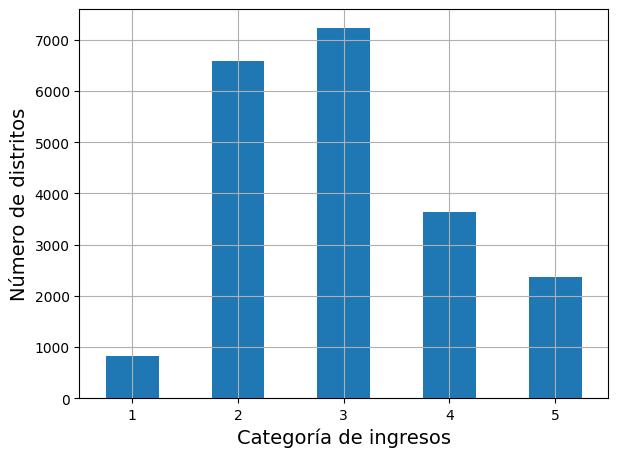

In [163]:
# Cuenta cuántos distritos hay en cada categoría de ingreso y crea un gráfico de barras
# value_counts(): cuenta las ocurrencias de cada categoría
# sort_index(): ordena las categorías en orden ascendente (1, 2, 3, 4, 5)
# plot.bar(): crea un gráfico de barras
# rot=0: mantiene las etiquetas del eje X horizontales (sin rotación)
# grid=True: añade una cuadrícula al gráfico para facilitar la lectura
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

# Establece la etiqueta del eje X
plt.xlabel("Categoría de ingresos")

# Establece la etiqueta del eje Y
plt.ylabel("Número de distritos")

# Guarda la figura (código adicional)
save_fig("housing_income_cat_bar_plot")

# Muestra el gráfico en pantalla
plt.show()

Ahora podemos hacer **muestreo estratificado** basado en la categoría de ingresos.

Scikit-Learn proporciona varias clases de **splitters** en el paquete `sklearn.model_selection` que implementan diferentes estrategias para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.

Cada splitter tiene un método `split()` que devuelve un iterador sobre distintas divisiones de entrenamiento/prueba del mismo conjunto de datos.

Para ser precisos, el método `split()` devuelve los **índices** de entrenamiento y prueba, no los datos en sí.

Tener múltiples divisiones puede ser útil si queremos estimar mejor el desempeño del modelo, como veremos más adelante al hablar de **validación cruzada**.

Por ejemplo, el siguiente código genera **10 divisiones estratificadas diferentes** del mismo conjunto de datos.


In [164]:
from sklearn.model_selection import StratifiedShuffleSplit

# Crea un objeto StratifiedShuffleSplit para realizar muestreo estratificado
# n_splits=10: genera 10 divisiones diferentes train/test
# test_size=0.2: el 20% de los datos irá al conjunto de prueba
# random_state=42: semilla para reproducibilidad de resultados
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Lista para almacenar las 10 divisiones estratificadas
strat_splits = []

# Itera sobre las 10 divisiones generadas
# split() retorna los índices para train y test en cada iteración
# El segundo parámetro (housing["income_cat"]) indica la columna a usar para estratificación
# Esto garantiza que cada split mantenga la misma proporción de categorías de ingreso
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # Selecciona las filas correspondientes al conjunto de entrenamiento usando los índices
    strat_train_set_n = housing.iloc[train_index]

    # Selecciona las filas correspondientes al conjunto de prueba usando los índices
    strat_test_set_n = housing.iloc[test_index]

    # Añade la tupla (train, test) a la lista de splits
    strat_splits.append((strat_train_set_n, strat_test_set_n))

Podemos usar el primer resultado del muestreo estratificado:

In [165]:
strat_train_set, strat_test_set = strat_splits[0]

O, dado que el muestreo estratificado es bastante común, existe una forma más corta de obtener una única división utilizando la función train_test_split() con el argumento stratify:

In [166]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

Veamos si esto funcionó como se esperaba. Podemos empezar revisando las proporciones de las categorías de ingresos en el conjunto de prueba:


In [167]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


Con un código similar, podemos medir las proporciones de las categorías de ingresos en todo el conjunto de datos.

Vamos a intentar comparar las proporciones de las categorías de ingresos en el conjunto completo, en el conjunto de prueba generado mediante muestreo estratificado y en un conjunto de prueba generado mediante muestreo puramente aleatorio.


In [168]:
def income_cat_proportions(data):
    """
    Calcula la proporción de cada categoría de ingreso en el dataset.
    Divide el conteo de cada categoría por el número total de instancias.
    Retorna las proporciones como valores entre 0 y 1.
    """
    return data["income_cat"].value_counts() / len(data)

# Crea una división aleatoria simple (sin estratificación) para comparación
# test_size=0.2: 20% para prueba, 80% para entrenamiento
# random_state=42: semilla para reproducibilidad
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Crea un DataFrame para comparar las proporciones de categorías de ingreso
# Cada llamada a income_cat_proportions() retorna una Serie con índice (categorías 1-5)
#
# Ejemplo de lo que retorna cada función:
#   income_cat_proportions(housing) -> Serie: 1:0.039, 2:0.318, 3:0.350, 4:0.176, 5:0.114
#   income_cat_proportions(strat_test_set) -> Serie: 1:0.040, 2:0.319, 3:0.350, 4:0.176, 5:0.115
#   income_cat_proportions(test_set) -> Serie: 1:0.035, 2:0.324, 3:0.342, 4:0.183, 5:0.116
#
# pandas.DataFrame() recibe un diccionario donde:
#   - Las claves ("Overall %", "Stratified %", "Random %") se convierten en nombres de columnas
#   - Los valores (Series) se alinean automáticamente por su índice (categorías de ingreso)
#   - pandas empareja filas que tienen el mismo índice, creando una tabla donde cada fila
#     representa una categoría de ingreso y cada columna muestra su proporción en diferentes conjuntos
#
compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()  # Ordena las filas por índice (categorías 1, 2, 3, 4, 5)

# Asigna nombre al índice para mayor claridad
compare_props.index.name = "Categoría de ingreso"

# Calcula el error porcentual del muestreo estratificado respecto al dataset original
# Error = (proporción_estratificada / proporción_original) - 1
# Ejemplo: si Overall=0.350 y Stratified=0.350, entonces (0.350/0.350)-1 = 0.0 (0% error)
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)

# Calcula el error porcentual del muestreo aleatorio respecto al dataset original
# Ejemplo: si Overall=0.350 y Random=0.342, entonces (0.342/0.350)-1 = -0.0229 (-2.29% error)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)

# Multiplica por 100 para convertir a porcentajes y redondea a 2 decimales
# Ejemplo: -0.0229 * 100 = -2.29 (significa 2.29% menos que el original)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Categoría de ingreso,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Como se puede ver, el conjunto de prueba generado con muestreo estratificado tiene proporciones de categorías de ingresos casi idénticas a las del conjunto completo, mientras que el conjunto generado de forma aleatoria está sesgado.

**Resumen:**

El muestreo estratificado asegura que las proporciones de las categorías importantes (como ingresos) en el conjunto de prueba reflejen las del conjunto completo, evitando sesgos que ocurren con muestreo aleatorio puro.

No volveremos a utilizar la columna income_cat, por lo que podemos eliminarla, devolviendo los datos a su estado original:

In [169]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Hemos dedicado un tiempo considerable a la generación del conjunto de prueba por una razón justificada: se trata de una parte crítica de un proyecto de aprendizaje automático que con frecuencia se pasa por alto. Además, muchas de estas ideas serán útiles más adelante al abordar la validación cruzada.

# Explorar y Visualizar los Datos para Obtener Información

Hasta ahora, solo hemos echado un vistazo rápido a los datos para comprender de manera general el tipo de información con la que estamos trabajando. Ahora, el objetivo es profundizar un poco más.

Primero, debemos asegurarnos de haber apartado el conjunto de prueba y de estar explorando únicamente el conjunto de entrenamiento. Además, si el conjunto de entrenamiento es muy grande, podría ser conveniente extraer una muestra para la fase de exploración, con el fin de que las manipulaciones sean más fáciles y rápidas. En este caso, el conjunto de entrenamiento es relativamente pequeño, por lo que podemos trabajar directamente sobre el conjunto completo.

Dado que vamos a experimentar con diversas transformaciones del conjunto de entrenamiento completo, conviene crear una copia del original para poder volver a él posteriormente.

In [170]:
housing = strat_train_set.copy()

Dado que el conjunto de datos incluye información geográfica (latitud y longitud), es recomendable crear un gráfico de dispersión de todos los distritos para visualizar la información:

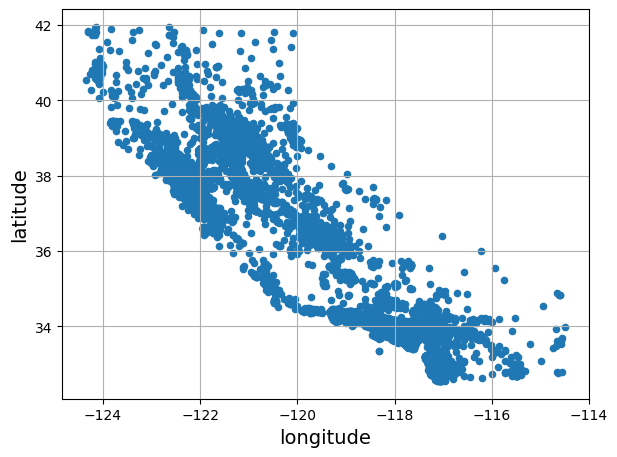

In [171]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")
plt.show()

Esto efectivamente se asemeja a California, pero más allá de eso es difícil identificar algún patrón particular. Ajustar la opción alpha a 0.2 facilita mucho la visualización de las zonas donde existe una alta densidad de puntos de datos:

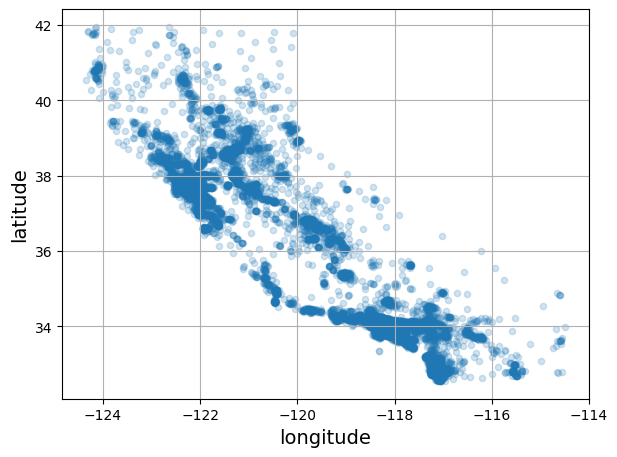

In [172]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")
plt.show()

En este contexto, el parámetro alpha controla la transparencia de los puntos en el gráfico de dispersión.

* alpha=1 significa completamente opaco (sin transparencia).
* alpha=0 significa completamente transparente (invisible).

Valores intermedios, como alpha=0.2, hacen que los puntos sean muy transparentes.

Esto es útil cuando hay muchos puntos que se superponen, como en nuestro ejemplo con los distritos de California. Al reducir la opacidad, podemos ver las zonas de alta densidad de datos, ya que los puntos que se superponen se ven más oscuros, mientras que las áreas con pocos puntos permanecen claras.

Intentemos mejorar todavía más la representación:

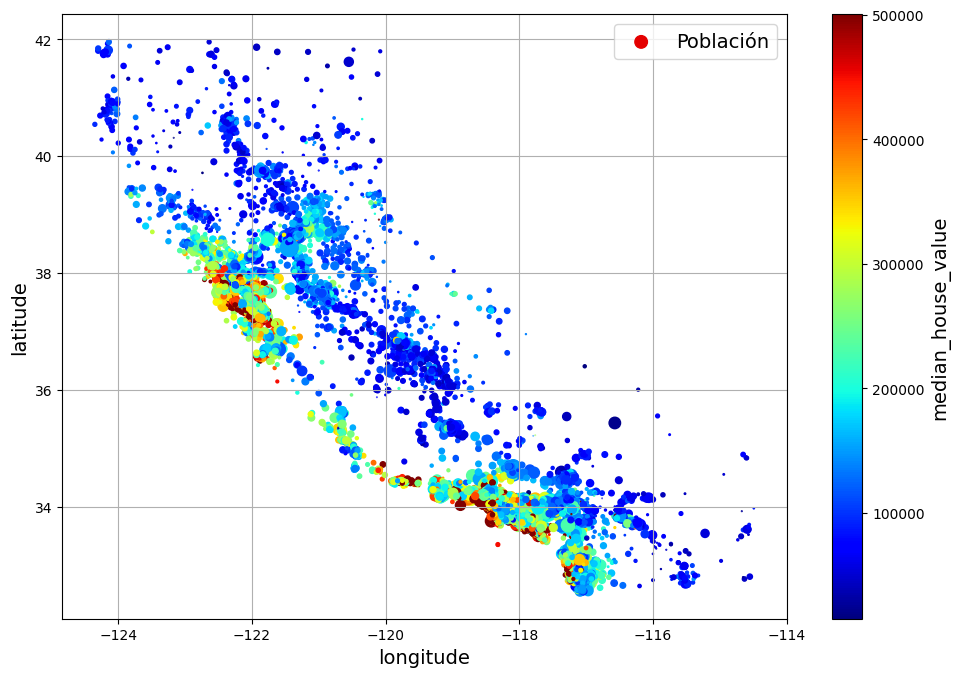

In [173]:
# Crea un gráfico de dispersión (scatter plot) para visualizar datos geográficos
# Este gráfico muestra la ubicación geográfica de los distritos con información adicional
housing.plot(
    kind="scatter",  # Tipo de gráfico: dispersión (cada punto es un distrito)
    x="longitude",  # Eje X: longitud geográfica
    y="latitude",  # Eje Y: latitud geográfica (crea un "mapa" de California)
    grid=True,  # Muestra cuadrícula para facilitar la lectura
    s=housing["population"] / 100,  # Tamaño de cada punto proporcional a la población (dividido por 100 para escalar)
    label="Población",  # Etiqueta para el tamaño de los puntos
    c="median_house_value",  # Color de cada punto según el valor mediano de la vivienda
    cmap="jet",  # Mapa de colores: azul (barato) -> rojo (caro)
    colorbar=True,  # Muestra barra de colores para interpretar los valores
    legend=True,  # Muestra leyenda del gráfico
    sharex=False,  # No comparte el eje X con otros subplots
    figsize=(10, 7)  # Tamaño de la figura en pulgadas (ancho, alto)
)

# Guarda la figura (código adicional)
save_fig("housing_prices_scatterplot")

# Muestra el gráfico en pantalla
plt.show()

En el gráfico anterior, el radio de cada círculo representa la población del distrito (opción s) y el color representa el precio (opción c). Aquí se utiliza un mapa de colores predefinido (cmap) llamado jet, que va desde azul (valores bajos) hasta rojo (precios altos).

Esta visualización nos indica que los precios de la vivienda están muy relacionados con la ubicación (por ejemplo, cerca del océano) y con la densidad de población, como probablemente ya sabíamos. Un algoritmo de clustering podría ser útil para detectar los principales grupos y para generar nuevas características que midan la proximidad a los centros de los clústeres. El atributo proximidad al océano también puede ser relevante, aunque en el norte de California los precios de las viviendas en los distritos costeros no son excesivamente altos, por lo que no se trata de una regla simple.

Nota: El argumento `sharex=False` corrige un error de visualización: sin él, los valores y la etiqueta del eje x no se muestran (ver: [https://github.com/pandas-dev/pandas/issues/10611](https://github.com/pandas-dev/pandas/issues/10611)).


La siguiente celda es una versión mejorada de la figura anterior, con una imagen de California añadida en el fondo, nombres de etiquetas más claros y sin cuadrícula que porpone Gerón en su libro para mejor interpretación:


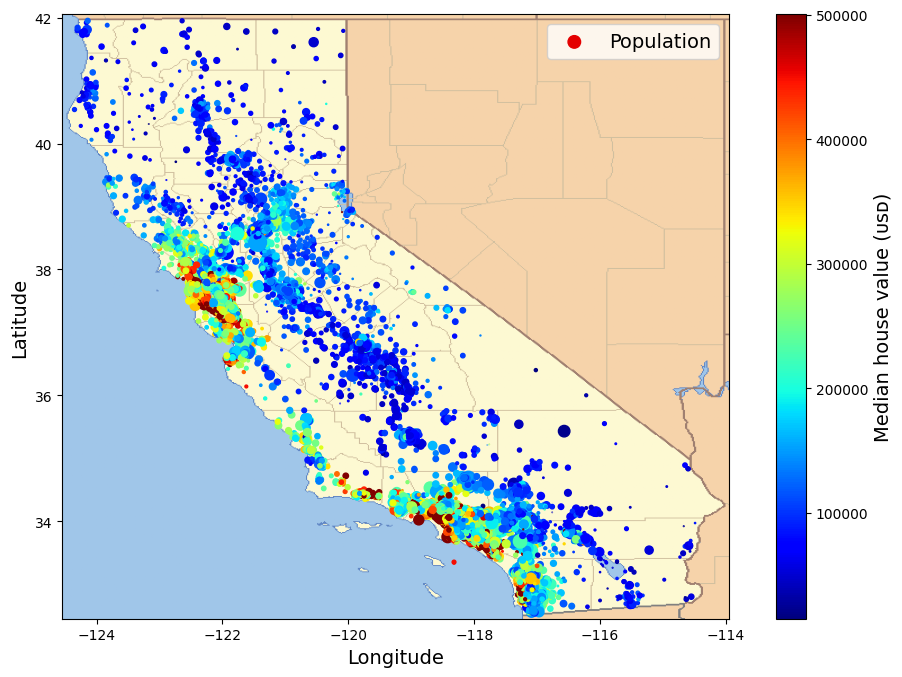

In [174]:
# Descarga la imagen de California para usar como fondo del gráfico
filename = "california.png"

# Verifica si la imagen ya existe localmente
if not (IMAGES_PATH / filename).is_file():
    # URL base del repositorio del libro en GitHub
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    # Construye la URL completa del archivo
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    # Descarga la imagen y la guarda en la carpeta de imágenes
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

# Renombra las columnas del DataFrame para que tengan nombres más descriptivos
# y con mayúsculas para mejorar la presentación visual en el gráfico
housing_renamed = housing.rename(columns={
    "latitude": "Latitude",
    "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})

# Crea el mismo scatter plot que antes, pero con columnas renombradas
housing_renamed.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    s=housing_renamed["Population"] / 100,  # Tamaño proporcional a la población
    label="Population",
    c="Median house value (ᴜsᴅ)",  # Color según el valor de la vivienda
    cmap="jet",  # Mapa de colores: azul (barato) -> rojo (caro)
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10, 7))

# Lee la imagen de California descargada
california_img = plt.imread(IMAGES_PATH / filename)

# Define los límites geográficos de California (longitud_min, longitud_max, latitud_min, latitud_max)
# Estos valores enmarcan el área de California en coordenadas geográficas
axis = -124.55, -113.95, 32.45, 42.05

# Establece los límites de los ejes del gráfico
plt.axis(axis)

# Superpone la imagen de California como fondo del scatter plot
# extent=axis alinea la imagen con las coordenadas geográficas especificadas
plt.imshow(california_img, extent=axis)

# Guarda la figura
save_fig("california_housing_prices_plot")

# Muestra el gráfico con la imagen de California de fondo y los puntos superpuestos
plt.show()

# Búsqueda de Correlaciones

Dado que el conjunto de datos no es demasiado grande, se puede calcular fácilmente el coeficiente de correlación estándar (también llamado r de Pearson) entre cada par de atributos usando el método corr(). Veamos, por ejemplo, cuánto se correlaciona cada atributo con el valor mediano de la vivienda.

In [175]:
# Pandas ahora trata por defecto numeric_only=False, por lo que debemos especificarlo
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


El coeficiente de correlación varía entre –1 y 1. Cuando está cerca de 1, indica una fuerte correlación positiva; por ejemplo, el valor mediano de la vivienda tiende a aumentar cuando el ingreso mediano aumenta. Cuando el coeficiente está cerca de –1, significa que existe una fuerte correlación negativa; se puede observar una pequeña correlación negativa entre la latitud y el valor mediano de la vivienda (es decir, los precios tienen una ligera tendencia a disminuir cuando se va hacia el norte). Finalmente, coeficientes cercanos a 0 indican que no existe correlación lineal.

Otra forma de verificar la correlación entre atributos es usar la función scatter_matrix() de Pandas, que grafica cada atributo numérico contra todos los demás atributos numéricos. Con 11 atributos numéricos se obtendrían 11² = 121 gráficos, lo cual no cabría en una página, por lo que es recomendable enfocarse en algunos atributos prometedores que parecen más correlacionados con el valor mediano de la vivienda. La diagonal principal de esta matriz de dispersión muestra un histograma de los valores de cada atributo en lugar de graficar cada variable contra sí misma, lo cual no sería útil.

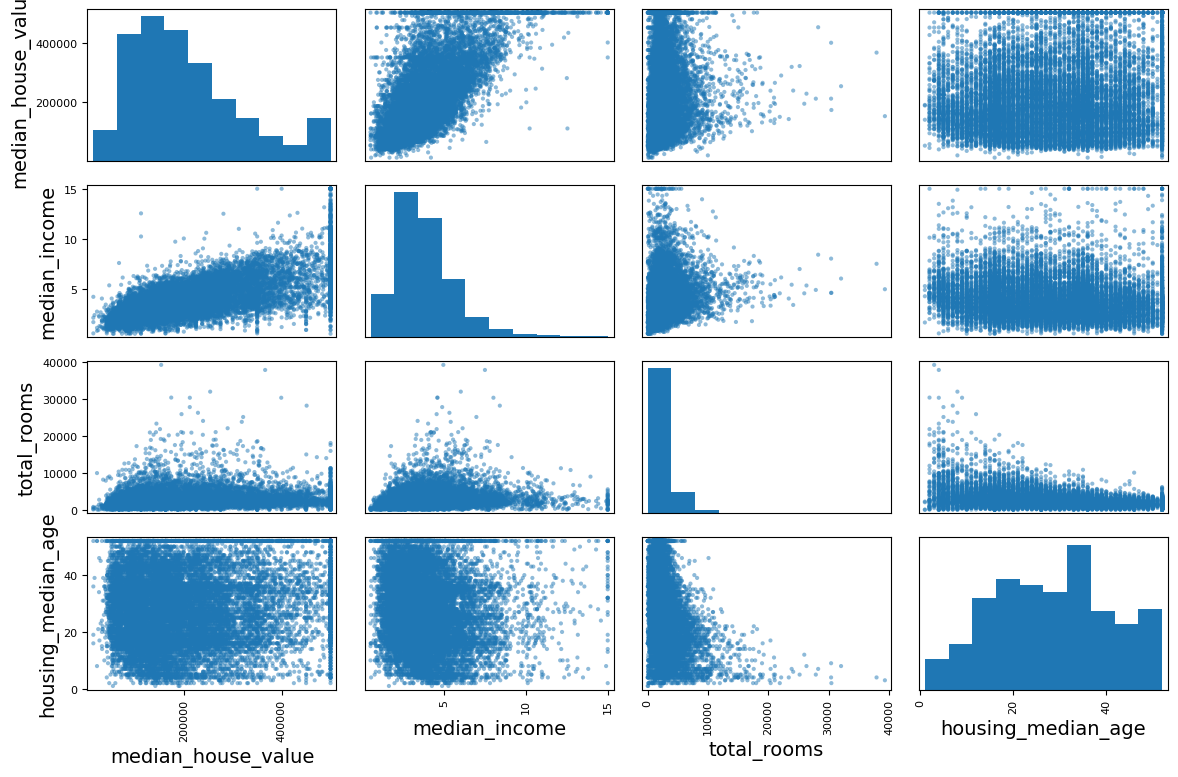

In [176]:
from pandas.plotting import scatter_matrix

# Lista de atributos seleccionados para analizar sus correlaciones
# Se eligen los atributos que parecen más prometedores o relevantes
# para entender su relación con el valor mediano de la vivienda
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

# Crea una matriz de dispersión (scatter matrix) que muestra:
# - En la diagonal principal: histogramas de cada atributo
# - Fuera de la diagonal: gráficos de dispersión entre cada par de atributos
#
# Con 4 atributos, se generan 4x4 = 16 subgráficos:
#   Fila 1: histograma de median_house_value | scatter(value vs income) | scatter(value vs rooms) | scatter(value vs age)
#   Fila 2: scatter(income vs value) | histograma de median_income | scatter(income vs rooms) | scatter(income vs age)
#   Fila 3: scatter(rooms vs value) | scatter(rooms vs income) | histograma de total_rooms | scatter(rooms vs age)
#   Fila 4: scatter(age vs value) | scatter(age vs income) | scatter(age vs rooms) | histograma de housing_median_age
#
# Esto permite visualizar rápidamente qué pares de atributos tienen correlaciones fuertes
# (patrones lineales o tendencias claras) y cuáles no (nubes de puntos dispersas)
#
# housing[attributes]: selecciona solo las columnas especificadas del DataFrame
# figsize=(12, 8): define el tamaño de la figura completa en pulgadas
scatter_matrix(housing[attributes], figsize=(12, 8))

# Guarda la figura (código adicional)
save_fig("scatter_matrix_plot")

# Muestra el gráfico en pantalla
plt.show()

# Análisis de Correlación: Ingreso Mediano vs Valor de Vivienda

Al observar los gráficos de dispersión de correlación, el atributo más prometedor para predecir el valor mediano de la vivienda parece ser el ingreso mediano, por lo que se realiza un zoom en su gráfico de dispersión.



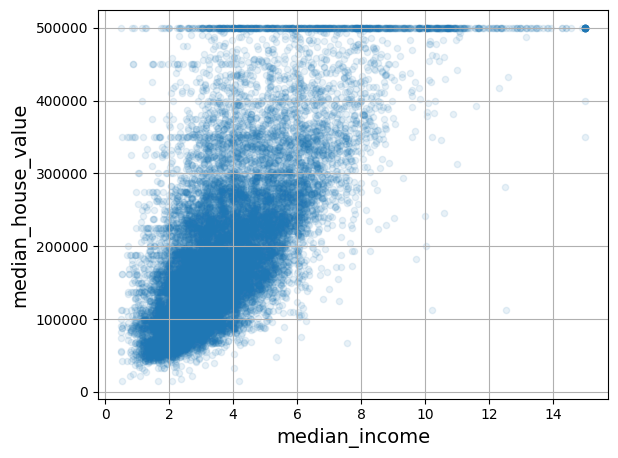

In [177]:
# Crea un gráfico de dispersión para analizar la relación entre ingreso mediano y valor de vivienda
# Este es un zoom específico en la correlación más prometedora detectada en la matriz de dispersión
housing.plot(
    kind="scatter",  # Tipo de gráfico: dispersión
    x="median_income",  # Eje X: ingreso mediano del distrito
    y="median_house_value",  # Eje Y: valor mediano de la vivienda
    alpha=0.1,  # Transparencia de los puntos (0.1 = muy transparente)
                # Esto permite visualizar zonas con alta densidad de puntos superpuestos
                # donde los puntos aparecerán más oscuros debido a la acumulación
    grid=True  # Muestra cuadrícula para facilitar la lectura de valores
)

# Guarda la figura (código adicional)
save_fig("income_vs_house_value_scatterplot")

# Muestra el gráfico en pantalla
# Este gráfico revela la fuerte correlación positiva entre ingreso y valor de vivienda
# También hace visibles anomalías como líneas horizontales en $500k, $450k, $350k, etc.
plt.show()

Este gráfico revela varios aspectos importantes.

* Primero, la correlación es efectivamente bastante fuerte; se puede observar claramente la tendencia ascendente y los puntos no están demasiado dispersos.
* Segundo, el límite de precio observado anteriormente es claramente visible como una línea horizontal en \$500,000. Sin embargo, el gráfico también revela otras líneas rectas menos obvias: una línea horizontal alrededor de \$450,000, otra alrededor de \$350,000, quizás una alrededor de \$280,000, y algunas más por debajo. Podría ser conveniente considerar eliminar los distritos correspondientes para evitar que los algoritmos aprendan a reproducir estas peculiaridades de los datos.

Advertencia importante: El coeficiente de correlación solo mide correlaciones lineales ("conforme x aumenta, y generalmente aumenta/disminuye"). Puede pasar por alto completamente relaciones no lineales (por ejemplo, "conforme x se acerca a 0, y generalmente aumenta"). Existen casos donde los gráficos muestran un coeficiente de correlación igual a 0, a pesar de que sus ejes claramente no son independientes: estos son ejemplos de relaciones no lineales. También hay casos donde el coeficiente de correlación es igual a 1 o –1, y esto no tiene nada que ver con la pendiente. Por ejemplo, tu altura en metros tiene un coeficiente de correlación de 1 con tu altura en pulgadas o en nanómetros.

# Experimentación con Combinaciones de Atributos

Las secciones anteriores proporcionan diversas formas de explorar los datos y obtener insights. Se han identificado peculiaridades en los datos que conviene limpiar antes de alimentar el algoritmo de machine learning, y se han encontrado correlaciones interesantes entre atributos, particularmente con el atributo objetivo. También se observó que algunos atributos tienen distribución asimétrica hacia la derecha, por lo que podría ser conveniente transformarlos (por ejemplo, calculando su logaritmo o raíz cuadrada). Aunque los detalles varían considerablemente con cada proyecto, las ideas generales son similares.

Una última acción recomendada antes de preparar los datos para los algoritmos de machine learning es probar varias combinaciones de atributos. Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no se conoce cuántos hogares hay; lo que realmente interesa es el número de habitaciones por hogar. De manera similar, el número total de dormitorios por sí solo no es muy útil: probablemente conviene compararlo con el número de habitaciones. La población por hogar también parece una combinación de atributos interesante.

In [178]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [179]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


Al crear estos nuevos atributos (rooms_per_house, bedrooms_ratio, people_per_house) y analizar nuevamente la matriz de correlación, se descubre que el nuevo atributo bedrooms_ratio está mucho más correlacionado con el valor mediano de la vivienda que el número total de habitaciones o dormitorios. Aparentemente, las casas con una relación dormitorio/habitación más baja tienden a ser más caras. El número de habitaciones por hogar también es más informativo que el número total de habitaciones en un distrito: obviamente, cuanto más grandes son las casas, más caras son.
Esta ronda de exploración no tiene que ser absolutamente exhaustiva; el objetivo es comenzar con buen pie y obtener rápidamente insights que ayuden a crear un primer prototipo razonablemente bueno. Sin embargo, este es un proceso iterativo: una vez que se tiene un prototipo funcionando, se puede analizar su salida para obtener más insights y volver a este paso de exploración.

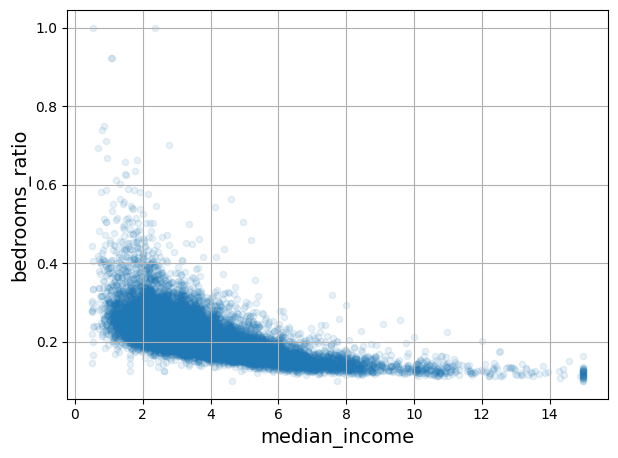

In [180]:
# NOTA: Este código no está originalmente en el libro de Géron
# Lo añado para visualizar gráficamente la correlación entre
# ingreso mediano y la ratio de dormitorios, que según la matriz
# de correlación mostró ser un atributo interesante (-0.256397)

# Crea un gráfico de dispersión para analizar la relación entre
# ingreso mediano y la proporción de dormitorios respecto al total de habitaciones
housing.plot(
    kind="scatter",  # Tipo de gráfico: dispersión
    x="median_income",  # Eje X: ingreso mediano del distrito
    y="bedrooms_ratio",  # Eje Y: ratio de dormitorios (total_bedrooms / total_rooms)
    alpha=0.1,  # Transparencia de los puntos para visualizar densidad
                # Las zonas con más puntos superpuestos se verán más oscuras
    grid=True  # Muestra cuadrícula para facilitar la lectura
)

# Guarda la figura (código adicional)
save_fig("income_vs_bedrooms_ratio_value_scatterplot")

# Muestra el gráfico en pantalla
# Este gráfico permite observar visualmente cómo la ratio de dormitorios
# varía en relación con el ingreso mediano, complementando el análisis
# numérico de correlación realizado anteriormente
plt.show()

Explicación del atributo bedrooms_ratio: bedrooms_ratio es un atributo derivado (feature engineering) que representa la proporción de dormitorios respecto al total de habitaciones en cada distrito.

Cálculo:

pythonbedrooms_ratio = total_bedrooms / total_rooms

Interpretación:

* Valor alto (cercano a 1): Significa que casi todas las habitaciones son dormitorios. Por ejemplo, si bedrooms_ratio = 0.8, el 80% de las habitaciones son dormitorios. Esto podría indicar viviendas pequeñas o apartamentos con poco espacio común.
* Valor bajo (cercano a 0): Significa que hay pocas habitaciones dedicadas a dormitorios en comparación con el total. Por ejemplo, si bedrooms_ratio = 0.3, solo el 30% de las habitaciones son dormitorios. Esto sugiere casas más grandes con espacios comunes amplios (salas, comedores, estudios, etc.).

Por qué es útil:

Según el análisis de correlación del libro, bedrooms_ratio tiene una correlación negativa de -0.256397 con el valor mediano de la vivienda. Esto significa que:

* Casas más caras tienden a tener un bedrooms_ratio más bajo: tienen más habitaciones que no son dormitorios (espacios comunes, oficinas, bibliotecas, etc.)
* Casas más baratas tienden a tener un bedrooms_ratio más alto: la mayoría de sus habitaciones son dormitorios, con menos espacio común

Este atributo derivado es más informativo que usar simplemente total_bedrooms o total_rooms por separado, porque captura la relación estructural entre estos dos valores, lo cual es más relevante para predecir el precio de una vivienda.

# Preparar los Datos para Algoritmos de Machine Learning

Es momento de preparar los datos para los algoritmos de machine learning. En lugar de hacerlo manualmente, se deben escribir funciones para este propósito por varias razones importantes:

1. Permitirá reproducir fácilmente estas transformaciones en cualquier conjunto de datos futuro
2. Se construirá gradualmente una biblioteca de funciones de transformación reutilizables en proyectos futuros
3. Estas funciones podrán usarse en el sistema en producción para transformar nuevos datos antes de alimentar los algoritmos
4. Facilitará probar varias transformaciones para ver qué combinación funciona mejor.

Primero, se debe revertir a un conjunto de entrenamiento limpio (copiando strat_train_set nuevamente) y separar los predictores de las etiquetas, ya que no necesariamente se querrán aplicar las mismas transformaciones a ambos. El método drop() crea una copia de los datos y no afecta al conjunto original.


In [181]:
# Revierte al conjunto de entrenamiento estratificado original y separa
# las características (predictores) de las etiquetas (variable objetivo)

# Crea una copia del conjunto de entrenamiento SIN la columna objetivo
# axis=1 indica que se está eliminando una columna (no una fila)
# drop() NO modifica strat_train_set, sino que crea una nueva copia
# (a menos que se especifique inplace=True)
# Este DataFrame 'housing' contiene solo las características (features) que se usarán
# para entrenar el modelo: longitude, latitude, housing_median_age, total_rooms,
# total_bedrooms, population, households, median_income, ocean_proximity
housing = strat_train_set.drop("median_house_value", axis=1)

# Crea una copia de SOLO la columna objetivo (las etiquetas)
# copy() asegura que sea una copia independiente y no una referencia
# 'housing_labels' contiene los valores que el modelo intentará predecir
# Es importante separar características y etiquetas porque:
# - Las transformaciones que se aplicarán a las características no deben
#   aplicarse a las etiquetas
# - Los algoritmos de ML esperan recibir X (características) e y (etiquetas)
#   como argumentos separados
housing_labels = strat_train_set["median_house_value"].copy()

Limpieza de Datos:

La mayoría de los algoritmos de machine learning no pueden trabajar con características faltantes, por lo que es necesario abordar este problema. Por ejemplo, el atributo total_bedrooms tiene algunos valores faltantes.

Existen tres opciones:

1. Eliminar los distritos correspondientes
2. Eliminar el atributo completo
3. Establecer los valores faltantes a algún valor (cero, la media, la mediana, etc.), lo cual se llama imputación.

Estas opciones pueden realizarse fácilmente con los métodos dropna(), drop() y fillna() de Pandas DataFrame.


In [182]:
# Limpieza de Datos - Manejo de Valores Faltantes (NaN)
# El libro lista 3 opciones para manejar los valores NaN en total_bedrooms

# OPCIÓN 1: Eliminar las filas (distritos) que tienen valores faltantes
# dropna() elimina todas las filas donde 'total_bedrooms' es NaN
# subset=["total_bedrooms"]: especifica que solo se revise esta columna
# inplace=True: modifica el DataFrame original en lugar de crear una copia
# DESVENTAJA: Pierdes datos (207 distritos en este caso)

# housing.dropna(subset=["total_bedrooms"], inplace=True)

# OPCIÓN 2: Eliminar toda la columna que contiene valores faltantes
# drop() elimina completamente el atributo 'total_bedrooms'
# axis=1: indica que se está eliminando una columna (no una fila)
# DESVENTAJA: Pierdes información potencialmente útil para el modelo

# housing.drop("total_bedrooms", axis=1)

# OPCIÓN 3: Imputación - Reemplazar valores faltantes con un valor estadístico
# Calcula la mediana de los valores existentes en 'total_bedrooms'

# median = housing["total_bedrooms"].median()

# fillna() reemplaza todos los NaN con la mediana calculada
# inplace=True: modifica el DataFrame original
# VENTAJA: Es la opción menos destructiva, conserva tanto las filas como la columna
# y proporciona un valor razonable basado en la distribución de los datos
# housing["total_bedrooms"].fillna(median, inplace=True)

# La opción 3 (imputación) es generalmente preferida porque:
# - No se pierden datos (filas o columnas)
# - La mediana es robusta ante outliers
# - Mantiene el tamaño del dataset para entrenamiento

In [183]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1
housing_option1.loc[null_rows_idx].head()

housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2
housing_option2.loc[null_rows_idx].head()


housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

/tmp/ipython-input-3705293781.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN



En su libro, Gerón opta por la opción 3 (imputación) ya que es la menos destructiva, pero en lugar del código básico de Pandas, se utiliza la clase SimpleImputer de Scikit-Learn.

El beneficio es que almacenará el valor mediano de cada característica, lo que permitirá imputar valores faltantes no solo en el conjunto de entrenamiento, sino también en los conjuntos de validación, prueba y cualquier dato nuevo alimentado al modelo.

Para usarlo, primero se crea una instancia de SimpleImputer especificando que se quiere reemplazar los valores faltantes de cada atributo con la mediana de ese atributo. Dado que la mediana solo puede calcularse en atributos numéricos, se crea una copia de los datos con solo los atributos numéricos (excluyendo el atributo de texto ocean_proximity). Luego se ajusta la instancia del imputer a los datos de entrenamiento usando el método fit(), que calcula la mediana de cada atributo y almacena el resultado en su variable de instancia statistics_.

In [184]:
from sklearn.impute import SimpleImputer

# Crea una instancia de SimpleImputer para manejar valores faltantes
# SimpleImputer es una clase de Scikit-Learn que proporciona una forma
# más robusta y reutilizable de imputar valores faltantes comparado con fillna()
#
# strategy="median": especifica que los valores faltantes se reemplazarán
# con la mediana de cada columna
#
# VENTAJAS de usar SimpleImputer en lugar de fillna():
# 1. Almacena las medianas calculadas internamente (en imputer.statistics_)
# 2. Puede aplicarse consistentemente a nuevos datos (conjunto de validación,
#    test, o datos en producción) usando las mismas medianas del entrenamiento
# 3. Se integra perfectamente en pipelines de Scikit-Learn
# 4. Garantiza que el conjunto de test use las mismas estadísticas que el train,
#    evitando data leakage (filtración de información)
#
# Otras estrategias disponibles:
# - strategy="mean": usa la media aritmética
# - strategy="most_frequent": usa el valor más frecuente (útil para categóricos)
# - strategy="constant": usa un valor constante especificado con fill_value
imputer = SimpleImputer(strategy="median")

Aunque solo total_bedrooms tenía valores faltantes, no se puede garantizar que no habrá valores faltantes en nuevos datos una vez el sistema esté en producción, por lo que es más seguro aplicar el imputer a todos los atributos numéricos.

Dado que la mediana solo puede calcularse en atributos numéricos, es necesario crear una copia de los datos con únicamente los atributos numéricos (esto excluirá el atributo de texto ocean_proximity):

In [185]:
# Crea una copia del DataFrame conteniendo SOLO los atributos numéricos
# select_dtypes() filtra las columnas según su tipo de dato
# include=[np.number]: incluye todas las columnas con tipos numéricos
#   (int64, float64, etc.)
#
# Esto excluye automáticamente la columna 'ocean_proximity' que es de tipo 'object'
# (texto/categórico)
#
# Este paso es necesario porque:
# - SimpleImputer con strategy="median" solo puede trabajar con datos numéricos
# - La mediana no tiene sentido para atributos categóricos de texto
# - Permite aplicar el imputer sin errores de tipo de dato
#
# housing_num contendrá: longitude, latitude, housing_median_age, total_rooms,
# total_bedrooms, population, households, median_income
housing_num = housing.select_dtypes(include=[np.number])

Finalmente, se usa este imputer "entrenado" para transformar el conjunto de entrenamiento reemplazando valores faltantes con las medianas aprendidas.

In [186]:
# Ajusta (entrena) el imputer con los datos numéricos del conjunto de entrenamiento
# El método fit() calcula y almacena la mediana de cada columna numérica
#
# Proceso interno:
# 1. Recorre cada columna de housing_num
# 2. Calcula la mediana de los valores NO faltantes en cada columna
# 3. Almacena estos valores en imputer.statistics_ (atributo interno)
#
# IMPORTANTE: fit() solo APRENDE las estadísticas, NO transforma los datos todavía
# La transformación (reemplazo de NaN) se hace después con transform()
#
# Las medianas calculadas se guardan para:
# - Aplicarlas luego al conjunto de entrenamiento con transform()
# - Reutilizarlas en el conjunto de validación/test con las MISMAS medianas
# - Usarlas en producción para nuevos datos, garantizando consistencia
#
# Esto es crucial para evitar data leakage: el conjunto de test NUNCA debe
# influir en las estadísticas calculadas, solo debe usar las del entrenamiento
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [187]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [188]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Ahora podemos usar este imputer "entrenado" para transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas aprendidas:

In [189]:
X = imputer.transform(housing_num)

Los valores faltantes también pueden reemplazarse con la media (strategy="mean"), el valor más frecuente (strategy="most_frequent"), o un valor constante (strategy="constant", fill_value=…). Las últimas dos estrategias soportan datos no numéricos.


Nota: Existen imputers más potentes disponibles en el paquete sklearn.impute: **KNNImputer** reemplaza cada valor faltante con la media de los valores de los k vecinos más cercanos para esa característica (la distancia se basa en todas las características disponibles), e **IterativeImputer** entrena un modelo de regresión por característica para predecir los valores faltantes basándose en todas las demás características disponibles, reentrenando el modelo con los datos actualizados y repitiendo el proceso varias veces, mejorando los modelos y los valores de reemplazo en cada iteración.

# Diseño de la API de Scikit-Learn

La API de Scikit-Learn está notablemente bien diseñada y se basa en varios principios fundamentales que hacen que la biblioteca sea intuitiva y consistente.

## Consistencia

Todos los objetos comparten una interfaz consistente y simple que se divide en tres categorías principales:

**Estimadores (Estimators):** Cualquier objeto que puede estimar parámetros basándose en un conjunto de datos se denomina estimador (por ejemplo, SimpleImputer es un estimador). La estimación se realiza mediante el método fit(), que toma un conjunto de datos como parámetro, o dos en el caso de algoritmos de aprendizaje supervisado, donde el segundo conjunto contiene las etiquetas. Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro (como el strategy de SimpleImputer) y debe establecerse como variable de instancia, generalmente a través de un parámetro del constructor.

**Transformadores (Transformers):** Algunos estimadores, como SimpleImputer, también pueden transformar un conjunto de datos. La transformación se realiza mediante el método transform() con el conjunto de datos a transformar como parámetro, que retorna el conjunto de datos transformado. Esta transformación generalmente se basa en los parámetros aprendidos, como es el caso de SimpleImputer. Todos los transformadores también tienen un método de conveniencia llamado fit_transform(), que es equivalente a llamar fit() y luego transform() (aunque a veces fit_transform() está optimizado y se ejecuta mucho más rápido).

**Predictores (Predictors):** Finalmente, algunos estimadores, dado un conjunto de datos, son capaces de hacer predicciones. Un predictor tiene un método predict() que toma un conjunto de datos de nuevas instancias y retorna un conjunto de datos de predicciones correspondientes. También tiene un método score() que mide la calidad de las predicciones, dado un conjunto de prueba (y las etiquetas correspondientes, en el caso de algoritmos de aprendizaje supervisado).

## Inspección

Todos los hiperparámetros del estimador son accesibles directamente a través de variables de instancia públicas (por ejemplo, imputer.strategy), y todos los parámetros aprendidos del estimador son accesibles a través de variables de instancia públicas con un sufijo de guión bajo (por ejemplo, imputer.statistics_).

## No Proliferación de Clases

Los conjuntos de datos se representan como arrays de NumPy o matrices dispersas de SciPy, en lugar de clases personalizadas. Los hiperparámetros son simplemente cadenas de texto o números de Python regulares.

## Composición

Los componentes existentes se reutilizan tanto como sea posible. Por ejemplo, es fácil crear un estimador Pipeline a partir de una secuencia arbitraria de transformadores seguida de un estimador final.

## Valores Predeterminados Sensatos

Scikit-Learn proporciona valores predeterminados razonables para la mayoría de los parámetros, lo que facilita la creación rápida de un sistema base funcional.

In [190]:
# Accede al atributo feature_names_in_ del imputer
# Este atributo almacena los nombres de las características (columnas) que fueron
# vistas durante el ajuste (fit) del imputer
#
# feature_names_in_ es un array de NumPy que contiene los nombres de las columnas
# en el orden en que fueron procesadas
#
# Este atributo sigue la convención de diseño de Scikit-Learn:
# - Los parámetros APRENDIDOS durante fit() terminan con guión bajo (_)
# - feature_names_in_ se crea automáticamente cuando se llama fit() con un DataFrame
#
# Es útil para:
# - Verificar qué características fueron procesadas
# - Debugging: asegurar que el imputer vio las columnas correctas
# - Reconstruir DataFrames después de transform() (que retorna arrays NumPy)
#
# Ejemplo de salida:
# array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
#        'total_bedrooms', 'population', 'households', 'median_income'])
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Los transformadores de Scikit-Learn producen arrays de NumPy (o a veces matrices dispersas de SciPy) como salida, incluso cuando reciben DataFrames de Pandas como entrada. Por lo tanto, la salida de imputer.transform(housing_num) es un array de NumPy: X no tiene nombres de columnas ni índice. Afortunadamente, no es demasiado difícil envolver X en un DataFrame y recuperar los nombres de columnas y el índice de housing_num:

In [191]:
# Convierte el array NumPy resultante de la transformación de vuelta a un DataFrame
#
# Después de aplicar imputer.transform(housing_num), el resultado X es un array
# de NumPy que ha perdido:
# - Los nombres de las columnas (longitude, latitude, etc.)
# - El índice de las filas (identificadores de los distritos)
#
# pd.DataFrame() crea un nuevo DataFrame a partir de:
# - X: el array NumPy con los datos transformados (valores faltantes imputados)
# - columns=housing_num.columns: recupera los nombres originales de las columnas
# - index=housing_num.index: recupera el índice original de las filas
#
# Esto es importante porque:
# - Mantiene la trazabilidad de qué columna es qué característica
# - Permite realizar operaciones de Pandas posteriores (merge, join, etc.)
# - Facilita la interpretación y visualización de los datos transformados
# - Conserva la correspondencia entre filas y sus identificadores originales
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

In [192]:
imputer.strategy

'median'

In [193]:
# Muestra las primeras 5 filas del DataFrame transformado que originalmente
# contenían valores faltantes (NaN)
#
# null_rows_idx: es un índice que identifica # las filas que tenían valores
# NaN en 'total_bedrooms' antes de la imputación
#
# .loc[null_rows_idx]: selecciona solo las filas especificadas por el índice
# .head(): muestra las primeras 5 filas del resultado
#
# Propósito:
# - Verificar que la imputación funcionó correctamente
# - Comparar los valores imputados (medianas) con los datos originales
# - Confirmar que donde antes había NaN ahora hay valores numéricos válidos
# - Es una buena práctica de debugging para validar las transformaciones
#
# Esto permite observar específicamente las filas que fueron modificadas
# por el imputer, facilitando la validación del proceso de limpieza de datos
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


# Manejo de Atributos de Texto y Categóricos

Hasta el momento solo se han tratado atributos numéricos, pero los datos también pueden contener atributos de texto. En este conjunto de datos, existe solo uno: el atributo ocean_proximity. A continuación se examinan sus valores para las primeras instancias del conjunto de datos.

In [194]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


No es texto arbitrario: existe un número limitado de valores posibles, cada uno de los cuales representa una categoría. Por lo tanto, este atributo es un atributo categórico. La mayoría de los algoritmos de machine learning prefieren trabajar con números, por lo que es necesario convertir estas categorías de texto a números. Para esto, se puede utilizar la clase OrdinalEncoder de Scikit-Learn:

In [195]:
from sklearn.preprocessing import OrdinalEncoder

# Crea una instancia de OrdinalEncoder para convertir categorías de texto a números
# OrdinalEncoder es un transformador de Scikit-Learn que asigna un número entero
# único a cada categoría distinta en los datos
ordinal_encoder = OrdinalEncoder()

# Ajusta el encoder y transforma los datos categóricos en un solo paso
# fit_transform() realiza dos operaciones:
# 1. fit(): aprende todas las categorías únicas presentes en housing_cat
#    (por ejemplo: '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND')
#    y les asigna números enteros secuenciales (0, 1, 2, 3, 4)
# 2. transform(): convierte cada valor categórico a su número correspondiente
#
# Entrada (housing_cat): DataFrame/array con valores de texto
#   Ejemplo: ['NEAR BAY', 'INLAND', '<1H OCEAN', 'INLAND', ...]
#
# Salida (housing_cat_encoded): array NumPy con valores numéricos
#   Ejemplo: [[3], [1], [0], [1], ...]
#
# IMPORTANTE: El encoder guarda el mapeo categoría->número internamente
# en ordinal_encoder.categories_, permitiendo aplicar la misma codificación
# consistentemente a nuevos datos (validación, test, producción)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [196]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

Podemos obtener la lista de categorías usando la variable de instancia categories_. Es una lista que contiene un array unidimensional de categorías para cada atributo categórico (en este caso, una lista que contiene un único array ya que solo hay un atributo categórico):

In [197]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Limitaciones de la Codificación Ordinal y One-Hot Encoding

Un problema con la representación ordinal es que los algoritmos de machine learning asumirán que dos valores cercanos son más similares que dos valores distantes. Esto puede ser aceptable en algunos casos (por ejemplo, para categorías ordenadas como "malo", "promedio", "bueno" y "excelente"), pero claramente no es el caso para la columna ocean_proximity (por ejemplo, las categorías 0 y 4 son evidentemente más similares entre sí que las categorías 0 y 1, aunque numéricamente 0 y 1 estén más cerca).

Para solucionar este problema, una solución común es crear un atributo binario por cada categoría: un atributo igual a 1 cuando la categoría es "<1H OCEAN" (y 0 en caso contrario), otro atributo igual a 1 cuando la categoría es "INLAND" (y 0 en caso contrario), y así sucesivamente.

Esto se denomina codificación one-hot (one-hot encoding), porque solo un atributo será igual a 1 (caliente o "hot"), mientras que los demás serán 0 (fríos o "cold"). Los nuevos atributos a veces se denominan atributos dummy.

Scikit-Learn proporciona la clase OneHotEncoder para convertir valores categóricos en vectores one-hot:

In [198]:
from sklearn.preprocessing import OneHotEncoder

# Crea una instancia de OneHotEncoder para convertir categorías en vectores one-hot
# OneHotEncoder es un transformador que crea atributos binarios (variables dummy)
# para representar categorías sin implicar orden o proximidad numérica
cat_encoder = OneHotEncoder()

# Ajusta el encoder y transforma los datos categóricos en un solo paso
# fit_transform() realiza dos operaciones:
# 1. fit(): aprende todas las categorías únicas en housing_cat
#    Ejemplo: ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
# 2. transform(): convierte cada categoría en un vector one-hot
#
# Entrada (housing_cat): DataFrame/array con valores categóricos
#   Ejemplo: ['NEAR BAY', 'INLAND', '<1H OCEAN', ...]
#
# Salida (housing_cat_1hot): matriz dispersa (sparse matrix) de SciPy
#   Cada fila representa una instancia
#   Cada columna representa una categoría
#   Solo un valor es 1 (la categoría presente), el resto son 0
#
# Ejemplo de transformación:
#   'NEAR BAY'   -> [0, 0, 0, 1, 0]  (solo la columna de NEAR BAY es 1)
#   'INLAND'     -> [0, 1, 0, 0, 0]  (solo la columna de INLAND es 1)
#   '<1H OCEAN'  -> [1, 0, 0, 0, 0]  (solo la columna de <1H OCEAN es 1)
#
# NOTA: El resultado es una matriz dispersa (sparse) para ahorrar memoria,
# ya que la mayoría de los valores son 0
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [199]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

Una matriz dispersa es una representación muy eficiente para matrices que contienen principalmente ceros. Internamente, solo almacena los valores distintos de cero y sus posiciones. Cuando un atributo categórico tiene cientos o miles de categorías, la codificación one-hot resulta en una matriz muy grande llena de ceros excepto por un único 1 por fila. En este caso, una matriz dispersa es exactamente lo que se necesita: ahorrará mucha memoria y acelerará los cálculos. Se puede usar una matriz dispersa de manera similar a un array 2D normal, pero si se desea convertirla a un array (denso) de NumPy, simplemente se llama al método toarray():

In [200]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternativamente, se puede establecer sparse=False al crear el OneHotEncoder, en cuyo caso el método transform() devolverá un array (denso) de NumPy regular directamente.
Al igual que con el OrdinalEncoder, se puede obtener la lista de categorías usando la variable de instancia categories_ del encoder:

In [201]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [202]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas tiene una función llamada get_dummies(), que también convierte cada característica categórica en una representación one-hot, con una característica binaria por cada categoría:

In [203]:
# Crea un DataFrame de prueba con dos instancias de ocean_proximity
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})

# Aplica codificación one-hot usando la función get_dummies() de Pandas
# get_dummies() convierte automáticamente columnas categóricas en variables dummy
#
# Entrada (df_test):
#   ocean_proximity
#   0    INLAND
#   1    NEAR BAY
#
# Salida esperada (DataFrame con columnas one-hot):
#   ocean_proximity_INLAND  ocean_proximity_NEAR BAY
#   0                    1                         0
#   1                    0                         1
#
# Diferencias con OneHotEncoder de Scikit-Learn:
# - get_dummies() es más simple y directo para uso exploratorio
# - NO necesita fit(): transforma directamente sin "aprender" categorías
# - Retorna un DataFrame (no array o matriz dispersa)
# - DESVENTAJA: No puede aplicarse consistentemente a nuevos datos porque
#   no guarda las categorías aprendidas. Si df_test tuviera solo "INLAND",
#   solo crearía una columna, causando inconsistencias
# - OneHotEncoder es preferible en pipelines de producción por su consistencia
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [204]:
# Demuestra la ventaja de OneHotEncoder sobre get_dummies()
#
# cat_encoder fue previamente entrenado (fit) con las 5 categorías originales:
# ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
#
# Al aplicar transform() (NO fit_transform()) al df_test que solo contiene
# 'INLAND' y 'NEAR BAY', el encoder:
# - Mantiene las 5 columnas originales (consistencia con entrenamiento)
# - Asigna 1s solo en las posiciones de 'INLAND' y 'NEAR BAY'
# - Asigna 0s en las otras 3 categorías ('<1H OCEAN', 'ISLAND', 'NEAR OCEAN')
#
# Salida esperada (matriz 2x5):
#   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
#   0          1       0       0         0
#   0          0       0       1         0
#
# VENTAJA CRÍTICA para producción:
# - El modelo fue entrenado esperando exactamente 5 características
# - Si usáramos get_dummies() en producción y llegaran solo 2 categorías,
#   obtendríamos solo 2 columnas, causando un error en el modelo
# - OneHotEncoder garantiza que SIEMPRE se generen las mismas 5 columnas,
#   sin importar qué categorías aparezcan en los nuevos datos
# - Esto previene errores de dimensionalidad y mantiene la consistencia
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Además, si se alimenta get_dummies() con un DataFrame que contiene una categoría desconocida (por ejemplo, "<2H OCEAN"), generará una columna para ella:

In [205]:
# Crea un DataFrame de prueba con una categoría DESCONOCIDA ("<2H OCEAN")
# que NO estaba presente en los datos de entrenamiento originales
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})

# get_dummies() crea columnas para CUALQUIER categoría que encuentre,
# incluyendo categorías nuevas/desconocidas
#
# Salida:
#   ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
#   0                       1                       0
#   1                       0                       1
#
# PROBLEMA: Esto genera columnas inconsistentes con el entrenamiento
# - El modelo fue entrenado con 5 categorías específicas
# - Ahora tendríamos una columna diferente ("<2H OCEAN")
# - Esto causaría errores dimensionales o predicciones incorrectas
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


Pero OneHotEncoder es más inteligente: detectará la categoría desconocida y lanzará una excepción. Si se prefiere, se puede establecer el hiperparámetro handle_unknown en "ignore", en cuyo caso simplemente representará la categoría desconocida con ceros:

In [206]:
# Configura el encoder para IGNORAR categorías desconocidas en lugar de lanzar error
# handle_unknown="ignore": representa categorías nuevas como vector de ceros
cat_encoder.handle_unknown = "ignore"

# Transforma el DataFrame con categoría desconocida
# Para "<2H OCEAN" (desconocida): genera [0., 0., 0., 0., 0.] (todos ceros)
# Para "ISLAND" (conocida): genera el vector one-hot correcto [0., 0., 1., 0., 0.]
#
# Ventajas de este enfoque:
# - NO rompe el pipeline de predicción con errores
# - Mantiene las 5 columnas consistentes con el entrenamiento
# - El modelo interpreta categorías desconocidas como "ninguna categoría conocida"
# - Es más robusto para sistemas en producción donde pueden aparecer datos inesperados
#
# Salida: matriz 2x5
#   Fila 0 ("<2H OCEAN" desconocida): [0., 0., 0., 0., 0.]
#   Fila 1 ("ISLAND" conocida):        [0., 0., 1., 0., 0.]
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

**Consejo**: Si un atributo categórico tiene un gran número de categorías posibles (por ejemplo, código de país, profesión, especie), la codificación one-hot resultará en un gran número de características de entrada. Esto puede ralentizar el entrenamiento y degradar el rendimiento. Si esto ocurre, se puede reemplazar la entrada categórica con características numéricas útiles relacionadas con las categorías: por ejemplo, se podría reemplazar la característica ocean_proximity con la distancia al océano (de manera similar, un código de país podría reemplazarse con la población del país y el PIB per cápita). Al trabajar con redes neuronales, se puede reemplazar cada categoría con un vector de baja dimensionalidad aprendible llamado embedding. Este es un ejemplo de aprendizaje de representación (representation learning).

Cuando se ajusta cualquier estimador de Scikit-Learn utilizando un DataFrame, el estimador almacena los nombres de las columnas en el atributo feature_names_in_. Scikit-Learn entonces asegura que cualquier DataFrame alimentado a este estimador después de eso (por ejemplo, para transform() o predict()) tenga los mismos nombres de columnas. Los transformadores también proporcionan un método get_feature_names_out() que se puede usar para construir un DataFrame alrededor de la salida del transformador:

In [207]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [208]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [209]:
# Crea un DataFrame a partir de la salida del OneHotEncoder
# Combina tres elementos para reconstruir un DataFrame completo:
# 1. Datos: cat_encoder.transform(df_test_unknown) - matriz one-hot transformada
# 2. Nombres de columnas: cat_encoder.get_feature_names_out() - nombres de características generadas
# 3. Índice: df_test_unknown.index - preserva el índice original del DataFrame de entrada
#
# Esto convierte la salida del encoder (array/matriz dispersa) de vuelta a un DataFrame
# con nombres descriptivos, facilitando la interpretación y manipulación posterior
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [210]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# Escalado y Transformación de Características

Una de las transformaciones más importantes es el escalado de características (**Feature Scaling**). Los algoritmos de machine learning no funcionan bien cuando los atributos numéricos tienen escalas muy diferentes. En los datos de vivienda, el número total de habitaciones varía de 6 a 39,320, mientras que los ingresos medianos solo varían de 0 a 15. Sin escalado, los modelos tenderán a ignorar el ingreso mediano y enfocarse más en el número de habitaciones.

Existen dos formas comunes de escalado:

1. Escalado min-max (min-max escaling)
2. Estandarización

**Advertencia:** Es crucial ajustar los escaladores solo a los datos de entrenamiento usando fit() o fit_transform(). Una vez entrenado, se usa transform() en los conjuntos de validación, prueba y nuevos datos. Si los nuevos datos contienen valores atípicos, pueden escalarse fuera del rango especificado; para evitarlo, establecer el hiperparámetro clip en True.

El escalado min-max (normalización) es el más simple: desplaza y reescala los valores al rango 0–1, restando el mínimo y dividiendo por la diferencia entre mínimo y máximo. Scikit-Learn proporciona MinMaxScaler para esto, con un hiperparámetro feature_range que permite cambiar el rango (por ejemplo, –1 a 1 para redes neuronales que prefieren entradas de media cero).

# Escalado Min-Max (Normalización)

El escalado min-max transforma los valores para que queden en un rango específico, típicamente 0–1. Resta el valor mínimo y divide por el rango (diferencia entre máximo y mínimo). Scikit-Learn proporciona MinMaxScaler para este propósito.

## Fórmula de Min-Max Scaling

$$x_{normalizado} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Donde:
- $x$ es el valor original
- $x_{min}$ es el valor mínimo del conjunto
- $x_{max}$ es el valor máximo del conjunto

## Ejemplo Práctico

Usemos el vector de ingresos medianos:

**Vector original:** [2, 4, 6, 8, 10]

**Paso 1:** Identificar mínimo y máximo
$$x_{min} = 2$$
$$x_{max} = 10$$

**Paso 2:** Calcular el rango
$$rango = x_{max} - x_{min} = 10 - 2 = 8$$

**Paso 3:** Aplicar la fórmula a cada valor
- $x_1 = \frac{2 - 2}{8} = \frac{0}{8} = 0$
- $x_2 = \frac{4 - 2}{8} = \frac{2}{8} = 0.25$
- $x_3 = \frac{6 - 2}{8} = \frac{4}{8} = 0.5$
- $x_4 = \frac{8 - 2}{8} = \frac{6}{8} = 0.75$
- $x_5 = \frac{10 - 2}{8} = \frac{8}{8} = 1$

**Vector normalizado:** [0, 0.25, 0.5, 0.75, 1]

**Resultado:** Todos los valores ahora están en el rango [0, 1], donde el valor mínimo original (2) se mapea a 0 y el valor máximo original (10) se mapea a 1.

In [211]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

# Estandarización

La estandarización centra los datos en media cero y desviación estándar 1 restando la media y dividiendo por la desviación estándar. A diferencia del escalado min-max, no restringe valores a un rango específico y es más robusta ante valores atípicos: un outlier extremo comprimiría los demás valores en min-max, pero afectaría poco a la estandarización. Scikit-Learn proporciona StandardScaler para este propósito.

## Fórmula de Estandarización

$$x_{estandarizado} = \frac{x - \mu}{\sigma}$$

Donde:
- $x$ es el valor original
- $\mu$ es la media de todos los valores
- $\sigma$ es la desviación estándar

## Ejemplo Práctico

Supongamos que tenemos el siguiente vector de ingresos medianos:

**Vector original:** [2, 4, 6, 8, 10]

**Paso 1:** Calcular la media
$$\mu = \frac{2 + 4 + 6 + 8 + 10}{5} = \frac{30}{5} = 6$$

**Paso 2:** Calcular la desviación estándar
$$\sigma = \sqrt{\frac{(2-6)^2 + (4-6)^2 + (6-6)^2 + (8-6)^2 + (10-6)^2}{5}} = \sqrt{\frac{16 + 4 + 0 + 4 + 16}{5}} = \sqrt{8} \approx 2.83$$

**Paso 3:** Aplicar la fórmula a cada valor
- $x_1 = \frac{2 - 6}{2.83} = \frac{-4}{2.83} \approx -1.41$
- $x_2 = \frac{4 - 6}{2.83} = \frac{-2}{2.83} \approx -0.71$
- $x_3 = \frac{6 - 6}{2.83} = \frac{0}{2.83} = 0$
- $x_4 = \frac{8 - 6}{2.83} = \frac{2}{2.83} \approx 0.71$
- $x_5 = \frac{10 - 6}{2.83} = \frac{4}{2.83} \approx 1.41$

**Vector estandarizado:** [-1.41, -0.71, 0, 0.71, 1.41]

**Resultado:** Los valores ahora tienen media = 0 y desviación estándar = 1, y están centrados alrededor de cero.

In [212]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

## Comparación con un Outlier

Si tuviéramos un outlier, por ejemplo: [2, 4, 6, 8, 100]

**Min-Max:** [0, 0.02, 0.04, 0.06, 1] → Los valores normales quedan comprimidos cerca de 0

**Estandarización:** [-0.71, -0.66, -0.61, -0.56, 2.54] → Los valores normales mantienen su separación relativa

Esto demuestra por qué la estandarización es más robusta ante outliers.

# Consejo sobre el escalado de Matrices Dispersas

Si se desea escalar una matriz dispersa sin convertirla primero a una matriz densa, se puede usar un StandardScaler con su hiperparámetro with_mean establecido en False: esto solo dividirá los datos por la desviación estándar, sin restar la media (ya que esto rompería la dispersión).

## Explicación

Las matrices dispersas (sparse matrices) son eficientes porque solo almacenan los valores distintos de cero. Si aplicamos la estandarización normal que resta la media:

**Ejemplo:**
- Matriz dispersa original: [0, 0, 5, 0, 10, 0, 0] (solo almacena 5 y 10)
- Media = 2.14
- Al restar la media: [-2.14, -2.14, 2.86, -2.14, 7.86, -2.14, -2.14]
- **Problema:** Ahora todos los valores son distintos de cero, perdiendo la eficiencia de la matriz dispersa

**Solución con `with_mean=False`:**
- No resta la media, solo divide por la desviación estándar
- Los ceros permanecen como ceros
- La matriz mantiene su estructura dispersa y eficiencia de memoria
- Útil especialmente en one-hot encoding con miles de categorías, donde la mayoría de valores son 0

```python
# Para matrices dispersas (como one-hot encoding)
scaler = StandardScaler(with_mean=False)
# Solo aplica: x / σ (sin restar μ)
```

# Transformación de Distribuciones con "heavy-tails"

Cuando la distribución de una característica tiene una cola pesada (es decir, cuando los valores alejados de la media no son exponencialmente raros), tanto el escalado min-max como la estandarización comprimirán la mayoría de los valores en un rango pequeño. A los modelos de machine learning generalmente no les gusta esto en absoluto. Por lo tanto, antes de escalar la característica, primero se debe transformar para reducir la cola pesada y, si es posible, hacer que la distribución sea aproximadamente simétrica.


Por ejemplo, una forma común de hacer esto para características positivas con cola pesada hacia la derecha es reemplazar la característica con su raíz cuadrada (o elevar la característica a una potencia entre 0 y 1). Si la característica tiene una cola realmente larga y pesada, como una distribución de ley de potencia (power law), entonces reemplazar la característica con su logaritmo puede ayudar.


Por ejemplo, la característica de población sigue aproximadamente una ley de potencia: los distritos con 10,000 habitantes son solo 10 veces menos frecuentes que los distritos con 1,000 habitantes, no exponencialmente menos frecuentes. Al calcular el logaritmo de esta característica, se obtiene una distribución muy cercana a una gaussiana (con forma de campana), lo cual es mucho mejor para los modelos de machine learning.

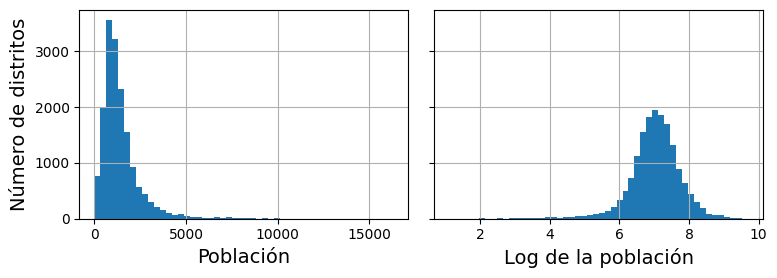

In [213]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Población")
axs[1].set_xlabel("Log de la población")
axs[0].set_ylabel("Número de distritos")
save_fig("long_tail_plot")
plt.show()

Otro enfoque para manejar características con colas pesadas consiste en bucketizar (agrupar en intervalos) la característica. Esto significa dividir su distribución en intervalos de tamaño aproximadamente igual y reemplazar cada valor de la característica con el índice del intervalo al que pertenece, de manera similar a lo que se hizo al crear la característica income_cat (aunque solo se usó para muestreo estratificado).
Por ejemplo, se podría reemplazar cada valor con su percentil. La bucketización con intervalos de tamaño igual resulta en una característica con una distribución casi uniforme, por lo que no hay necesidad de escalado adicional, o simplemente se puede dividir por el número de intervalos para forzar los valores al rango 0–1.

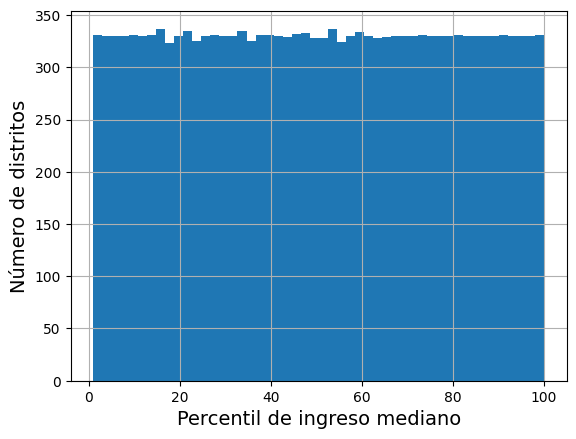

In [214]:
# Calcula los percentiles 1 al 99 de la característica median_income
# Esto crea 99 valores que dividen los datos en 100 grupos de igual tamaño
# Cada percentil p es el valor por debajo del cual cae el p% de los datos
# Ejemplo: percentil 25 es el valor donde el 25% de los datos son menores
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]

# Aplica bucketización usando pd.cut() para agrupar median_income en intervalos
# bins: define los límites de los intervalos
#   - [-np.inf]: añade menos infinito como límite inferior (captura valores mínimos)
#   - + percentiles: añade los 99 percentiles calculados como límites intermedios
#   - + [np.inf]: añade infinito como límite superior (captura valores máximos)
# Esto crea 100 intervalos en total
# labels=range(1, 101): asigna etiquetas del 1 al 100 a cada intervalo
# Resultado: cada valor de median_income se reemplaza por el número de su percentil (1-100)
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))

# Crea un histograma de la característica bucketizada
# La distribución resultante es aproximadamente uniforme (casi igual número de distritos
# en cada intervalo) porque cada bucket contiene aproximadamente el 1% de los datos
flattened_median_income.hist(bins=50)
plt.xlabel("Percentil de ingreso mediano")
plt.ylabel("Número de distritos")
plt.show()

# Nota: Los ingresos por debajo del percentil 1 están etiquetados como 1,
# y los ingresos por encima del percentil 99 están etiquetados como 100.
# Por eso la distribución va de 1 a 100 (no de 0 a 100)

# Manejo de Distribuciones Multimodales

Cuando una característica tiene una distribución multimodal (es decir, con dos o más picos claros, llamados modas), como housing_median_age, también puede ser útil bucketizarla, pero esta vez tratando los IDs de los intervalos como categorías en lugar de valores numéricos. Esto significa que los índices de los intervalos deben codificarse, por ejemplo usando OneHotEncoder (por lo que generalmente no se deben usar demasiados intervalos). Este enfoque permitirá que el modelo de regresión aprenda más fácilmente diferentes reglas para diferentes rangos de valores de esta característica.

Por ejemplo, quizás las casas construidas hace alrededor de 35 años tienen un estilo peculiar que pasó de moda, y por lo tanto son más baratas de lo que su edad por sí sola sugeriría.

Otro enfoque para transformar distribuciones multimodales es agregar una característica para cada una de las modas (al menos las principales), representando la similitud entre la edad mediana de la vivienda y esa moda particular.

La medida de similitud se calcula típicamente usando una función de base radial (RBF, radial basis function): cualquier función que dependa solo de la distancia entre el valor de entrada y un punto fijo.

La RBF más comúnmente usada es la RBF gaussiana, cuyo valor de salida decae exponencialmente a medida que el valor de entrada se aleja del punto fijo. Por ejemplo, la similitud RBF gaussiana entre la edad de la vivienda x y 35 está dada por la ecuación exp(–γ(x – 35)²). El hiperparámetro γ (gamma) determina qué tan rápido decae la medida de similitud a medida que x se aleja de 35.

Usando la función rbf_kernel() de Scikit-Learn, se puede crear una nueva característica RBF gaussiana que mide la similitud entre la edad mediana de la vivienda y 35. Esta nueva característica tiene su pico en 35, justo alrededor del pico en la distribución de housing_median_age: si este grupo de edad particular está bien correlacionado con precios más bajos, hay una buena probabilidad de que esta nueva característica sea útil.

# Función de Base Radial (RBF) - Explicación Detallada

Una función de base radial (RBF) mide la **similitud** o **cercanía** entre un valor y un punto de referencia fijo. Cuanto más cerca esté el valor del punto de referencia, mayor será la similitud.

## Fórmula de la RBF Gaussiana

$$similitud(x, c) = e^{-\gamma(x - c)^2}$$

Donde:
- $x$ = valor de entrada (por ejemplo, edad de la casa)
- $c$ = centro o punto de referencia (por ejemplo, 35 años)
- $\gamma$ (gamma) = controla qué tan rápido decae la similitud
- $e$ = número de Euler (≈ 2.718)

## Propiedades

- **Valor máximo:** Cuando $x = c$, la similitud = $e^0 = 1$ (100% de similitud)
- **Decaimiento:** A medida que $x$ se aleja de $c$, la similitud decae exponencialmente hacia 0
- **Simetría:** La función es simétrica alrededor de $c$

## Ejemplo

Supongamos que queremos medir la similitud de la edad de viviendas con respecto a 35 años, usando $\gamma = 0.1$:

**Para una casa de 35 años (justo en el centro):**
$$similitud(35, 35) = e^{-0.1(35-35)^2} = e^{-0.1 \cdot 0} = e^0 = 1$$
**Similitud = 1.0 (100%)**

**Para una casa de 36 años (1 año de diferencia):**
$$similitud(36, 35) = e^{-0.1(36-35)^2} = e^{-0.1 \cdot 1} = e^{-0.1} \approx 0.905$$
**Similitud ≈ 0.905 (90.5%)**

**Para una casa de 40 años (5 años de diferencia):**
$$similitud(40, 35) = e^{-0.1(40-35)^2} = e^{-0.1 \cdot 25} = e^{-2.5} \approx 0.082$$
**Similitud ≈ 0.082 (8.2%)**

**Para una casa de 50 años (15 años de diferencia):**
$$similitud(50, 35) = e^{-0.1(50-35)^2} = e^{-0.1 \cdot 225} = e^{-22.5} \approx 0.000000002$$
**Similitud ≈ 0 (prácticamente 0%)**

## Efecto del Parámetro γ (Gamma)

**γ pequeño (ejemplo: γ = 0.01):**
- Decaimiento **lento**
- La similitud se mantiene alta incluso lejos del centro
- Rango de influencia **amplio**

$$similitud(40, 35) = e^{-0.01(40-35)^2} = e^{-0.25} \approx 0.779$$

**γ grande (ejemplo: γ = 1.0):**
- Decaimiento **rápido**
- La similitud cae rápidamente al alejarse del centro
- Rango de influencia **estrecho**

$$similitud(40, 35) = e^{-1.0(40-35)^2} = e^{-25} \approx 0.0000000014$$

## ¿Por Qué Es Útil en Machine Learning?

En el ejemplo de viviendas:
- Si las casas de ~35 años son más baratas (por estilo pasado de moda)
- La RBF crea una característica que **captura esta particularidad**
- Casas cercanas a 35 años tendrán valor alto en esta característica
- El modelo puede aprender: "si age_simil_35 es alto → precio más bajo"
- Esto permite capturar **relaciones no lineales** que un modelo lineal simple no detectaría

## Múltiples Centros

Puedes crear múltiples características RBF para diferentes modas:
- `age_simil_35` para capturar casas alrededor de 35 años
- `age_simil_15` para capturar casas nuevas (15 años)
- `age_simil_50` para capturar casas antiguas (50 años)

Cada una captura un patrón diferente en la distribución multimodal.

In [215]:
from sklearn.metrics.pairwise import rbf_kernel

# Crea una nueva característica que mide la similitud entre la edad mediana
# de cada vivienda y el valor de referencia 35 años, usando RBF gaussiana
#
# rbf_kernel() calcula: e^(-gamma * (x - centro)^2) para cada valor x
#
# Parámetros:
# - housing[["housing_median_age"]]: datos de entrada (doble corchete para mantener formato DataFrame)
#   Cada fila es la edad de un distrito, shape: (n_samples, 1)
# - [[35]]: punto de referencia (centro) con shape (1, 1)
#   Representa la edad objetivo alrededor de la cual queremos medir similitud
# - gamma=0.1: controla la velocidad de decaimiento
#   Valores más altos = decaimiento más rápido (rango de influencia estrecho)
#   Valores más bajos = decaimiento más lento (rango de influencia amplio)
#
# Salida: array NumPy con shape (n_samples, 1)
# - Cada valor está entre 0 y 1
# - Valor cercano a 1: la edad está cerca de 35 años
# - Valor cercano a 0: la edad está lejos de 35 años
#
# Ejemplo de valores resultantes:
#   Edad 35 → similitud ≈ 1.0 (máxima similitud)
#   Edad 36 → similitud ≈ 0.905
#   Edad 40 → similitud ≈ 0.082
#   Edad 50 → similitud ≈ 0.000 (prácticamente sin similitud)
#
# Esta nueva característica ayuda al modelo a capturar patrones específicos
# alrededor de los 35 años, como si ese rango de edad tuviera características
# de precio particulares (ej: estilo arquitectónico específico)
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

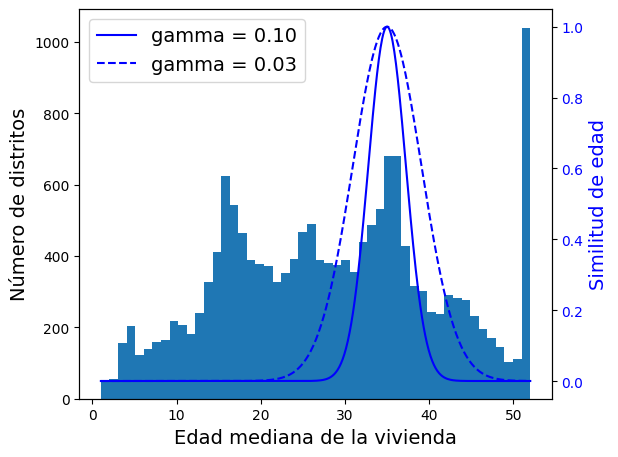

In [216]:
# Crea un array de 500 valores espaciados uniformemente entre la edad mínima y máxima
# para generar curvas suaves de las funciones RBF
# reshape(-1, 1) convierte el array 1D en array 2D columna (requerido por rbf_kernel)
ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)

# Define dos valores de gamma diferentes para comparar el efecto del parámetro
gamma1 = 0.1  # Decaimiento rápido (rango de influencia estrecho)
gamma2 = 0.03  # Decaimiento más lento (rango de influencia amplio)

# Calcula las similitudes RBF con centro en 35 para ambos valores de gamma
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

# Crea la figura y el primer eje
fig, ax1 = plt.subplots()

# Configura el primer eje para mostrar el histograma de edades
ax1.set_xlabel("Edad mediana de la vivienda")
ax1.set_ylabel("Número de distritos")
ax1.hist(housing["housing_median_age"], bins=50)

# Crea un segundo eje Y que comparte el mismo eje X (para superponer las curvas RBF)
ax2 = ax1.twinx()
color = "blue"
# Grafica ambas curvas RBF: línea sólida para gamma=0.1, línea discontinua para gamma=0.03
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Similitud de edad", color=color)

# Añade leyenda y guarda la figura
plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

# Transformación de los Valores Objetivo (Target)

Hasta ahora solo se han examinado las características de entrada, pero los valores objetivo también pueden necesitar transformación. Por ejemplo, si la distribución del target tiene una cola pesada (heavy-tail), se puede optar por reemplazar el target con su logaritmo. Sin embargo, si se hace esto, el modelo de regresión ahora predecirá el logaritmo del valor mediano de la vivienda, no el valor mediano en sí. Será necesario calcular el exponencial de la predicción del modelo si se desea obtener el valor mediano predicho de la vivienda.

Afortunadamente, la mayoría de los transformadores de Scikit-Learn tienen un método inverse_transform(), que facilita el cálculo de la inversa de sus transformaciones.

Por ejemplo, el siguiente código muestra cómo escalar las etiquetas usando StandardScaler (tal como se hizo para las entradas), luego entrenar un modelo simple de regresión lineal con las etiquetas escaladas resultantes y usarlo para hacer predicciones en nuevos datos, que se transforman de vuelta a la escala original usando el método inverse_transform() del scaler entrenado.

Es importante convertir las etiquetas de una Serie de Pandas a un DataFrame, ya que StandardScaler espera entradas 2D. En este ejemplo, el modelo se entrena solo con una característica de entrada sin procesar (median income) por simplicidad.

In [217]:
from sklearn.linear_model import LinearRegression

# Crea un StandardScaler específico para escalar los valores objetivo (labels)
# Es importante usar un scaler separado para los targets, no el mismo que para las features
target_scaler = StandardScaler()

# Ajusta el scaler a las etiquetas y las transforma
# housing_labels.to_frame(): convierte la Serie de Pandas a DataFrame (formato 2D requerido)
# fit_transform(): aprende la media y desviación estándar de los precios, y los escala
# scaled_labels ahora tiene media=0 y std=1
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Crea y entrena un modelo de regresión lineal simple
model = LinearRegression()
# Entrena con median_income como única feature (sin escalar, por simplicidad del ejemplo)
# y con las etiquetas escaladas como target
model.fit(housing[["median_income"]], scaled_labels)

# Simula nuevos datos: toma las primeras 5 filas de median_income
# En un caso real, estos serían datos completamente nuevos
some_new_data = housing[["median_income"]].iloc[:5]

# El modelo predice valores ESCALADOS (en la escala transformada: media=0, std=1)
scaled_predictions = model.predict(some_new_data)

# Convierte las predicciones escaladas de vuelta a la escala original (dólares)
# inverse_transform() aplica la transformación inversa: x_original = (x_scaled * std) + mean
# predictions ahora contiene valores en dólares, interpretables directamente
predictions = target_scaler.inverse_transform(scaled_predictions)

In [218]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

# TransformedTargetRegressor

Lo anterior funciona bien, pero una opción más simple es usar TransformedTargetRegressor. Simplemente se necesita construirlo, proporcionándole el modelo de regresión y el transformador de etiquetas, luego ajustarlo en el conjunto de entrenamiento usando las etiquetas originales sin escalar. Automáticamente usará el transformador para escalar las etiquetas y entrenar el modelo de regresión con las etiquetas escaladas resultantes, tal como se hizo anteriormente. Luego, cuando se quiera hacer una predicción, llamará al método predict() del modelo de regresión y usará el método inverse_transform() del scaler para producir la predicción.

## Resumen

TransformedTargetRegressor simplifica el proceso de transformar targets: se le pasa el modelo y el transformador (como StandardScaler), y automáticamente maneja el escalado de etiquetas durante el entrenamiento y la transformación inversa durante la predicción, eliminando la necesidad de hacerlo manualmente.

En lugar de:
1. Escalar manualmente las etiquetas con `fit_transform()`
2. Entrenar el modelo con etiquetas escaladas
3. Hacer predicciones
4. Aplicar manualmente `inverse_transform()` a las predicciones

Con TransformedTargetRegressor haces:
1. Crear `TransformedTargetRegressor(regressor=modelo, transformer=scaler)`
2. Entrenar con `fit(X, y)` usando etiquetas originales → automáticamente las escala internamente
3. Predecir con `predict(X)` → automáticamente aplica `inverse_transform()` y retorna valores en escala original

Es un wrapper que encapsula toda la lógica de transformación de targets, haciendo el código más limpio y menos propenso a errores.

In [219]:
from sklearn.compose import TransformedTargetRegressor

# Crea un TransformedTargetRegressor que envuelve el modelo de regresión
# y maneja automáticamente la transformación de las etiquetas (target)
#
# Parámetros:
# - LinearRegression(): el modelo de regresión base que se usará
# - transformer=StandardScaler(): el transformador que se aplicará a las etiquetas
#
# Ventajas sobre el enfoque manual:
# 1. No necesitas llamar fit_transform() manualmente en las etiquetas
# 2. No necesitas llamar inverse_transform() manualmente en las predicciones
# 3. Código más limpio y menos propenso a errores
# 4. Encapsula toda la lógica en un solo objeto
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

# Entrena el modelo con las etiquetas ORIGINALES (sin escalar)
# Internamente, TransformedTargetRegressor:
# 1. Aplica target_scaler.fit_transform(housing_labels) automáticamente
# 2. Entrena LinearRegression con las etiquetas escaladas
# 3. Guarda el scaler para uso posterior
model.fit(housing[["median_income"]], housing_labels)

# Hace predicciones en nuevos datos
# Internamente, TransformedTargetRegressor:
# 1. Llama a LinearRegression.predict(some_new_data) → obtiene predicciones escaladas
# 2. Aplica target_scaler.inverse_transform() automáticamente
# 3. Retorna predicciones en la escala original (dólares)
#
# El resultado es idéntico al enfoque manual anterior, pero con mucho menos código
predictions = model.predict(some_new_data)

In [220]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])